# Importing the datasets

In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import random 

In [151]:
#Label array for baseline only
label_array_baseline = np.loadtxt('../Labels_arrays/Raw/Raw_label_array_baseline.txt', dtype='str', delimiter=',').astype(str)
print(label_array_baseline.shape)

n = len(np.unique(label_array_baseline))
print(f'Number of classes : {n}')


#Label array for acquisition only
label_array_acquisition = np.loadtxt('../Labels_arrays/Raw/Raw_label_array_acquisition.txt', dtype='str', delimiter=',').astype(str)
print(label_array_acquisition.shape)

n = len(np.unique(label_array_acquisition))
print(f'Number of classes : {n}')


#Label array for Motor Imagery only
label_array_MI = np.loadtxt('../Labels_arrays/Raw/Raw_label_array_MI.txt', dtype='str', delimiter=',').astype(str)
print(label_array_MI.shape)

n = len(np.unique(label_array_MI))
print(f'Number of classes : {n}')

(2960,)
Number of classes : 37
(3120,)
Number of classes : 39
(6240,)
Number of classes : 39


In [152]:
#Storing the attributes of every subject
attributes = pd.read_csv('../attributes.csv')

#Selecting one random subject and printing his attributes (gender, age, ...)
select = np.random.randint(0, len(label_array_acquisition))

select = label_array_acquisition[select]
print(f"Subject selected : {select}")

display(attributes[attributes['SUJ_ID'] == select])

Subject selected : A50


,SUJ_ID,SUJ_gender,EXP_gender,COMMENTS,Perf_RUN_3,Perf_RUN_4,Perf_RUN_5,Perf_RUN_6,Birth_year,Vision,...,Q2,Q3,Q4,IM,EX,AX,TM,IN,SC,Interrogation
45,A50,1,1,Nothing/Unknown,47.5,50.0,50.0,62.5,1997,2,...,9,7,5,4,4.2,5.4,5.3,7.1,4.0,8


In [153]:
X_PSD_baseline = pd.read_csv('../Features_Dataframes/Raw/Raw_PSD_baseline_MI_BCI.csv') 
print(X_PSD_baseline.shape)


X_COH_baseline = pd.read_csv('../Features_Dataframes/Raw/Raw_COH_baseline_MI_BCI.csv')
print(X_COH_baseline.shape)


X_IHAR_baseline = pd.read_csv('../Features_Dataframes/Raw/Raw_IHAR_baseline_MI_BCI.csv')
print(X_IHAR_baseline.shape)

(2960, 675)
(2960, 1755)
(2960, 11)


In [154]:
X_PSD_acquisition = pd.read_csv('../Features_Dataframes/Raw/Raw_PSD_acquisition_MI_BCI.csv')
print(X_PSD_acquisition.shape)


X_COH_acquisition = pd.read_csv('../Features_Dataframes/Raw/Raw_COH_acquisition_MI_BCI.csv')
print(X_COH_acquisition.shape)


X_CSP_acquisition = pd.read_csv('../Features_Dataframes/Raw/Raw_CSP_acquisition_MI_BCI.csv')
print(X_CSP_acquisition.shape)

X_IHAR_acquisition = pd.read_csv('../Features_Dataframes/Raw/Raw_IHAR_acquisition_MI_BCI.csv')
print(X_IHAR_acquisition.shape)

(3120, 675)
(3120, 1755)
(3120, 6)
(3120, 11)


In [155]:
X_PSD_MI = pd.read_csv('../Features_Dataframes/Raw/Raw_PSD_onlineT_MI_BCI.csv')
print(X_PSD_MI.shape)

X_COH_MI = pd.read_csv('../Features_Dataframes/Raw/Raw_COH_onlineT_MI_BCI.csv')
print(X_COH_MI.shape)


X_CSP_MI = pd.read_csv('../Features_Dataframes/Raw/Raw_CSP_onlineT_MI_BCI.csv')
print(X_CSP_MI.shape)

X_IHAR_MI = pd.read_csv('../Features_Dataframes/Raw/Raw_IHAR_onlineT_MI_BCI.csv')
print(X_IHAR_MI.shape)

(6240, 675)
(6240, 1755)
(6240, 6)
(6240, 11)


We shuffle the data to avoid the following bias:  
- Having only the earliest windows in the fold 1 and latest windows in the last folds

In [156]:
#Seed to shuffle the dataframes (we need to apply the same shuffle on labels and arrays of course)
seed = random.randint(1, 100)
print(f"Random number generated : {seed}")
rng = np.random.RandomState(seed)

#Shuffling the arrays
rng.shuffle(label_array_acquisition)
rng.shuffle(label_array_MI)
rng.shuffle(label_array_baseline)


#Shuffling the dataframes
rng = np.random.RandomState(seed)           #We have to reset seed to match the shuffling of the labels
X_PSD_acquisition = X_PSD_acquisition.sample(frac=1, random_state=rng) #frac to select all the lines to shuffles, rng as the random_state (same as the array)
X_PSD_acquisition.reset_index(drop=True, inplace=True)

X_PSD_MI = X_PSD_MI.sample(frac=1, random_state=rng)
X_PSD_MI.reset_index(drop=True, inplace=True)

X_PSD_baseline = X_PSD_baseline.sample(frac=1, random_state=rng)
X_PSD_baseline.reset_index(drop=True, inplace=True)



rng = np.random.RandomState(seed)
X_COH_acquisition = X_COH_acquisition.sample(frac=1, random_state=rng)
X_COH_acquisition.reset_index(drop=True, inplace=True)

X_COH_MI = X_COH_MI.sample(frac=1, random_state=rng)
X_COH_MI.reset_index(drop=True, inplace=True)

X_COH_baseline = X_COH_baseline.sample(frac=1, random_state=rng)
X_COH_baseline.reset_index(drop=True, inplace=True)


rng = np.random.RandomState(seed)
X_CSP_acquisition = X_CSP_acquisition.sample(frac=1, random_state=rng)
X_CSP_acquisition.reset_index(drop=True, inplace=True)

X_CSP_MI = X_CSP_MI.sample(frac=1, random_state=rng)
X_CSP_MI.reset_index(drop=True, inplace=True)


rng = np.random.RandomState(seed)
X_IHAR_acquisition = X_IHAR_acquisition.sample(frac=1, random_state=rng)
X_IHAR_acquisition.reset_index(drop=True, inplace=True)

X_IHAR_MI = X_IHAR_MI.sample(frac=1, random_state=rng)
X_IHAR_MI.reset_index(drop=True, inplace=True)

X_IHAR_baseline = X_IHAR_baseline.sample(frac=1, random_state=rng)
X_IHAR_baseline.reset_index(drop=True, inplace=True)

Random number generated : 34


In [157]:
features_array_acquisition = pd.concat((X_PSD_acquisition, X_COH_acquisition, X_CSP_acquisition, X_IHAR_acquisition), axis=1)

features_array_MI = pd.concat((X_PSD_MI, X_COH_MI, X_CSP_MI, X_IHAR_MI), axis=1)

features_array_baseline = pd.concat((X_PSD_baseline, X_COH_baseline, X_IHAR_baseline), axis=1)

col_names = features_array_acquisition.columns

baseline_col_names = features_array_baseline.columns

In [158]:
print(f"Features array acquisition shape : {features_array_acquisition.shape} \t Label array shape : {label_array_acquisition.shape}")
print(f"Features array motor imagery shape : {features_array_MI.shape} \t Label array shape : {label_array_MI.shape}")
print(f"Features array baseline shape : {features_array_baseline.shape} \t Label array shape : {label_array_baseline.shape}")

Features array acquisition shape : (3120, 2447) 	 Label array shape : (3120,)
Features array motor imagery shape : (6240, 2447) 	 Label array shape : (6240,)
Features array baseline shape : (2960, 2441) 	 Label array shape : (2960,)


In [159]:
features_array_MI

,Power channel Fz band delta,Power channel Fz band theta,Power channel Fz band alpha,Power channel Fz band beta,Power channel Fz band gamma,Power channel FCz band delta,Power channel FCz band theta,Power channel FCz band alpha,Power channel FCz band beta,Power channel FCz band gamma,...,IHAR : FC5/FC2,IHAR : FC3/FC4,IHAR : FC1/FC6,IHAR : C5/C2,IHAR : C3/C4,IHAR : C1/C6,IHAR : CP5/CP2,IHAR : CP3/CP4,IHAR : CP1/CP6,IHAR : P3/P4
0,0.298170,0.060933,0.013566,0.337735,0.289596,0.338534,0.074129,0.022599,0.468022,0.096717,...,0.964849,0.868467,0.260088,0.752029,0.558485,0.082773,0.382697,0.917591,0.953940,1.006073
1,0.189347,0.092953,0.054454,0.499496,0.163750,0.147848,0.095586,0.056135,0.504741,0.195690,...,1.137500,1.342689,0.412529,0.866104,0.847479,0.044999,0.303753,1.075724,1.082167,1.144091
2,0.020154,0.010096,0.003611,0.043214,0.922925,0.059106,0.024304,0.010449,0.119121,0.787021,...,1.325104,0.479217,0.702824,1.552358,0.584321,0.046081,0.108154,1.065371,1.092006,1.187903
3,0.145470,0.091196,0.041992,0.336042,0.385300,0.167472,0.099879,0.061265,0.488619,0.182765,...,1.156611,1.364129,0.608947,1.056671,1.016803,0.088072,0.491484,1.043167,1.053347,1.094096
4,0.132088,0.061983,0.047917,0.251430,0.506582,0.218423,0.111668,0.094387,0.437850,0.137672,...,1.122694,1.248750,0.275832,1.321005,1.130526,0.044290,0.536417,1.021469,0.994901,1.103095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,0.554621,0.039380,0.008378,0.098957,0.298664,0.309340,0.027797,0.006982,0.098493,0.557387,...,1.341127,1.568492,0.301503,0.747138,0.461191,0.131397,0.442367,1.318817,1.144996,1.353209
6236,0.174658,0.051488,0.042317,0.354546,0.376991,0.230044,0.064222,0.067993,0.518513,0.119228,...,0.734821,0.731101,0.361750,1.075925,0.936113,0.055498,0.438515,0.871826,0.859391,0.830661
6237,0.512238,0.039252,0.010618,0.117630,0.320262,0.521710,0.062349,0.017482,0.251176,0.147283,...,1.054085,1.033682,0.216721,0.642327,0.457676,0.039002,0.284211,1.119926,0.997766,1.141857
6238,0.316013,0.070515,0.017398,0.328083,0.267991,0.247084,0.064592,0.019485,0.369546,0.299293,...,1.091807,1.236121,0.513945,0.641787,0.166866,0.086497,0.340942,1.025964,1.049870,1.048411


# Feature selection 

In [160]:
import heapq
from skfeature.function.information_theoretical_based import MRMR
from sklearn.feature_selection import SelectKBest, f_classif
import pymrmr

In [161]:
def feature_selection(x, y, k, method):
    
    if method == 'mRMR':

        #scores_mRMR: {numpy array}, shape (n_features,) index of selected features, F[0] is the most important feature
        indices = MRMR.mrmr(x, y)

    elif method  == 'ranking':

        #Here we use f_classif since we're doing multi-class classification
        k_best = SelectKBest(score_func=f_classif, k=k)

        #Applying SelectKBest then selecting best features on data
        k_best.fit(x, y)

        #scores_ : array-like of shape (n_features,) Scores of features
        p_values = k_best.pvalues_

        #To know if every feature is informative (they're all)
        #p_values = pd.DataFrame(p_values, columns=['p_value'])
        #print(len(p_values[p_values['p_value'] < 5e-10]))
        
        S_features = heapq.nsmallest(k, p_values)

        #Sort the index from max to min
        indices = np.argsort(S_features).tolist()

        #In our case the most relevant feature has the lowest p_value so we reverse the list
        indices.reverse()
        

    return indices

# Classification based on person identity

In [162]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from collections import Counter

Separating equally each (40 x number of files) epochs of each subject to ensure every subject is trained and tested

In [163]:
def subject_buckets(df, label, bins=5):
    # This function takes an epochs array, a label array and the integer bins and return the array buckets which store 5 bins (default) for every subject
    # (epochs, channels, resolution) * (epochs) * int -> (int, epochs//int, channels, resolution) * (int, epochs)


    #Extracting values to separate into buckets
    array = df.values

    classes = np.unique(label)
    x, y = array.shape

    #Re-referencing the data since we merge them with other subjects
    buckets_label = np.empty((bins, x//bins), dtype=object)

    #Initializing the list of dataframes
    DF = []

    #Iterating on every bucket
    for j in range(bins):

        #Initializing the bucket dataframe
        dataframe = np.zeros((x//bins, y))

    
        #Separating for each subject
        for i in range(len(classes)):
            
            #Index of the epochs of the specified subject
            idx_epochs = np.where(label==classes[i])[0]
            n = len(idx_epochs)
    
            #Selecting x rows (where x = #epochs // bins) for each subject
            index = idx_epochs[n//bins * j : n//bins * (j+1)]
            l = len(index)

            #Adding these first epochs in the bucket dataframe
            dataframe[l*i:l*(i+1), :] = array[index, :]

            #Doing the same for the labels
            buckets_label[j, l*i:l*(i+1)] = label[index]

        dataframe = pd.DataFrame(dataframe, columns=df.columns)
        DF.append(dataframe)
    
    return DF, buckets_label

In [164]:
def best_features_fold(buckets, buckets_label, bins=5):

    #Calculating features scores according to mRMR and ranking
    features_mRMR = []
    features_ranking = []

    #Calculating the best features for every training fold (bins-1 buckets)
    for i in range(bins):
                  
        #Separating into bins-1 buckets as training and the last one as a testing set
        index = [k for k in range(bins) if k!=i]
        
        #Creating the training dataframe and label_array (bins-1 folds)
        X = pd.DataFrame()
        y = np.array([])
        
        for j in index:
            X = pd.concat((X, buckets[j]), axis=0)
            y = np.concatenate((y, buckets_label[j]))

        X = X.reset_index(drop=True)
        
        mRMR = feature_selection(X.values, y, k=X.shape[1], method='mRMR')
        ranking = feature_selection(X.values, y, k=X.shape[1], method='ranking')

        features_mRMR.append(mRMR)
        features_ranking.append(ranking)

    return np.array(features_mRMR), np.array(features_ranking)

In [165]:
#The whole dataset for every condition

buckets, buckets_label = subject_buckets(features_array_baseline, label_array_baseline, bins=5)
features_mRMR_baseline, features_ranking_baseline = best_features_fold(buckets, buckets_label, bins=5)
print(f"For baseline : {features_mRMR_baseline.shape} (CSP patterns aren't in this set)")

buckets, buckets_label = subject_buckets(features_array_acquisition, label_array_acquisition, bins=5)
features_mRMR_acquisition, features_ranking_acquisition = best_features_fold(buckets, buckets_label, bins=5)
print(f"For acquisition : {features_mRMR_acquisition.shape}")

buckets, buckets_label = subject_buckets(features_array_MI, label_array_MI, bins=5)
features_mRMR_MI, features_ranking_MI = best_features_fold(buckets, buckets_label, bins=5)
print(f"For motor imagery : {features_mRMR_MI.shape}")

For baseline : (5, 2441) (CSP patterns aren't in this set)
For acquisition : (5, 2447)
For motor imagery : (5, 2447)


In [166]:
#PSD features

buckets, buckets_label = subject_buckets(X_PSD_baseline, label_array_baseline, bins=5)
PSD_mRMR_baseline, PSD_ranking_baseline = best_features_fold(buckets, buckets_label, bins=5)
print(f"For baseline : {PSD_mRMR_baseline.shape}")

buckets, buckets_label = subject_buckets(X_PSD_acquisition, label_array_acquisition, bins=5)
PSD_mRMR_acquisition, PSD_ranking_acquisition = best_features_fold(buckets, buckets_label, bins=5)
print(f"For acquisition : {PSD_mRMR_acquisition.shape}")

buckets, buckets_label = subject_buckets(X_PSD_MI, label_array_MI, bins=5)
PSD_mRMR_MI, PSD_ranking_MI = best_features_fold(buckets, buckets_label, bins=5)
print(f"For motor imagery : {PSD_mRMR_MI.shape}")

For baseline : (5, 675)
For acquisition : (5, 675)
For motor imagery : (5, 675)


In [167]:
#COH features

buckets, buckets_label = subject_buckets(X_COH_baseline, label_array_baseline, bins=5)
COH_mRMR_baseline, COH_ranking_baseline = best_features_fold(buckets, buckets_label, bins=5)
print(f"For baseline : {COH_mRMR_baseline.shape}")

buckets, buckets_label = subject_buckets(X_COH_acquisition, label_array_acquisition, bins=5)
COH_mRMR_acquisition, COH_ranking_acquisition = best_features_fold(buckets, buckets_label, bins=5)
print(f"For acquisition : {COH_mRMR_acquisition.shape}")

buckets, buckets_label = subject_buckets(X_COH_MI, label_array_MI, bins=5)
COH_mRMR_MI, COH_ranking_MI = best_features_fold(buckets, buckets_label, bins=5)
print(f"For motor imagery : {COH_mRMR_MI.shape}")

For baseline : (5, 1755)
For acquisition : (5, 1755)
For motor imagery : (5, 1755)


In [168]:
#CSP features

buckets, buckets_label = subject_buckets(X_CSP_acquisition, label_array_acquisition, bins=5)
CSP_mRMR_acquisition, CSP_ranking_acquisition = best_features_fold(buckets, buckets_label, bins=5)
print(f"For acquisition : {CSP_mRMR_acquisition.shape}")

buckets, buckets_label = subject_buckets(X_CSP_MI, label_array_MI, bins=5)
CSP_mRMR_MI, CSP_ranking_MI = best_features_fold(buckets, buckets_label, bins=5)
print(f"For motor imagery : {CSP_mRMR_MI.shape}")

For acquisition : (5, 6)
For motor imagery : (5, 6)


In [169]:
# IHAR features

buckets, buckets_label = subject_buckets(X_IHAR_baseline, label_array_baseline, bins=5)
IHAR_mRMR_baseline, IHAR_ranking_baseline = best_features_fold(buckets, buckets_label, bins=5)
print(f"For baseline : {IHAR_mRMR_baseline.shape}")

buckets, buckets_label = subject_buckets(X_IHAR_acquisition, label_array_acquisition, bins=5)
IHAR_mRMR_acquisition, IHAR_ranking_acquisition = best_features_fold(buckets, buckets_label, bins=5)
print(f"For acquisition : {IHAR_mRMR_acquisition.shape}")

buckets, buckets_label = subject_buckets(X_IHAR_MI, label_array_MI, bins=5)
IHAR_mRMR_MI, IHAR_ranking_MI = best_features_fold(buckets, buckets_label, bins=5)
print(f"For motor imagery : {IHAR_mRMR_MI.shape}")

For baseline : (5, 11)
For acquisition : (5, 11)
For motor imagery : (5, 11)


Recoding KFold Cross-validation since we separated the data into buckets

In [170]:
def KFolding(buckets, buckets_label, classifier, all_features=[], k=1, bins=5):

    #List of score for every testing fold
    scores_train = []
    scores_test  = []

    #Creating a list of classifiers to be able to see their parameters after fitting to the data
    classifiers = []

    #bins-fold cross validation
    for i in range(bins):

        #Reinitializing the classifier to avoid learning on the full dataset among iterations
        classifier = clone(classifier)
        
        #Separating into bins-1 buckets as training and the last one as a testing set
        index = [k for k in range(bins) if k!=i]
        
        #Creating the training dataframe and label_array (bins-1 folds)
        X = pd.DataFrame()
        y = np.array([])
        
        for j in index:
            X = pd.concat((X, buckets[j]), axis=0)
            y = np.concatenate((y, buckets_label[j]))

        #Taking the last fold as the testing one
        X_test = buckets[i]
        y_test = buckets_label[i]

        #Taking the k best features to do the classification
        best_features = all_features[i, :k]

        features_name = X.columns[best_features]
        
        #Fit the model + calculating the training_score and testing_score  
        classifier.fit(X[features_name], y)
        classifiers.append(classifier)

        scores_train.append(classifier.score(X[features_name], y))
        scores_test.append(classifier.score(X_test[features_name], y_test))

    return scores_train, scores_test, classifiers

#### RandomForest

Tune number of estimators

In [171]:
dot = 9

#Grid of estimators for RandomForestClassifier
estimators = np.linspace(1, 10, dot).astype(int)

La formule complète de cette règle est :

$$
f_{\text{max}} = \frac{N}{10 \times d}
$$
Avec :
$$
d = {N_{\text{trees}} \times N_{\text{leaves}}}
$$

Où :

N = number of sample  
f = number of features  
d = number of parameters to estimate (here we choose to pick the least number of parameter to estimate among all the trees and all the folds)  
-> for instance for Random Forest the number of parameters to estimate is equal to the number of leaves

In [172]:
def tune_estimators(x, y, features, estimators, dot=dot, N=2000):

    #Calculate the number of features relevant in our case
    f = x.shape[1]
    
    S_train = []
    S_test  = []
    i=int(100/dot)

    #Storing the classifiers for each iteration (to retrieve the best classifiers depending on estimators)
    classifiers = []

    #Separating the array into 5 buckets to perform 5-fold cross validation (but not random folds)
    buckets, buckets_label = subject_buckets(x, y, 5)

    for estimator in estimators:
            
        clf = RandomForestClassifier(n_estimators = estimator)

        scores_train, scores_test, clfs = KFolding(buckets, buckets_label, clf, k=f, all_features=features, bins=5)

        classifiers.append(clfs)

        S_train.append(np.mean(scores_train))
        S_test.append(np.mean(scores_test))

        print(f"Progress : {i}%")
        i+=int(100/dot)
        
    return S_train, S_test, classifiers

In [173]:
def plot_estimators(estimators, S_train, S_test, filenames):
    fig, ax = plt.subplots()
    ax.set_xlabel("Number of estimators")
    ax.set_ylabel("accuracy")
    ax.set_title(f"Accuracy vs n_estimators for training and testing sets with {filenames} files")
    ax.plot(estimators, S_train, marker="o", label="train", linestyle="-")
    ax.plot(estimators, S_test, marker="o", label="test", linestyle="-")
    ax.legend()
    plt.show()

    estimators_opti = estimators[np.argmax(S_test)]

    print(f"The best score is {max(S_test)} for estimators = {estimators_opti}")
    return estimators_opti

In [174]:
def unique_features(features_array, k=100):
    #The goal of this function is to select the k best features that are present in every fold and flatten them into one array (shape >= k)
    #Thus we could select every considered features in the feature_importance function instead of just having the k first features of one fold
    array = features_array.copy()

    array = array[:, :k]

    array = np.unique(array)

    return array

In [175]:
Sample_baseline = features_array_baseline.shape[0]
print(Sample_baseline)

2960


Progress : 11%
Progress : 22%
Progress : 33%
Progress : 44%
Progress : 55%
Progress : 66%
Progress : 77%
Progress : 88%
Progress : 99%


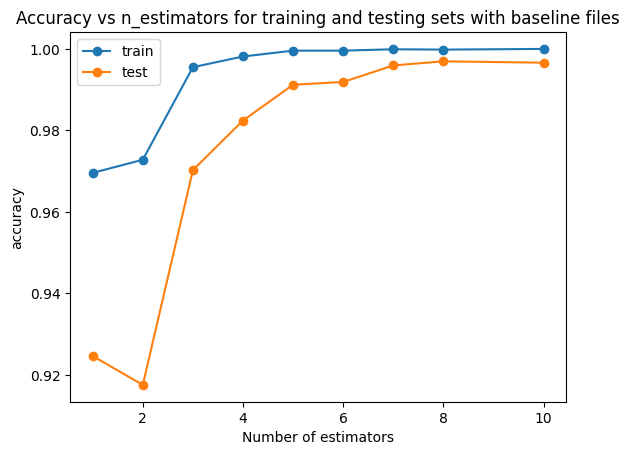

The best score is 0.9969594594594595 for estimators = 8


In [176]:
#For baseline files
S_train, S_test, classifiers = tune_estimators(features_array_baseline, label_array_baseline, features_mRMR_baseline, estimators, N=Sample_baseline)
estimators_opti_baseline = plot_estimators(estimators, S_train, S_test, "baseline")

In [177]:
estimators_opti_baseline = 3

In [178]:
Sample_acquisition = features_array_acquisition.shape[0]
print(Sample_acquisition)

3120


Progress : 11%
Progress : 22%
Progress : 33%
Progress : 44%
Progress : 55%
Progress : 66%
Progress : 77%
Progress : 88%
Progress : 99%


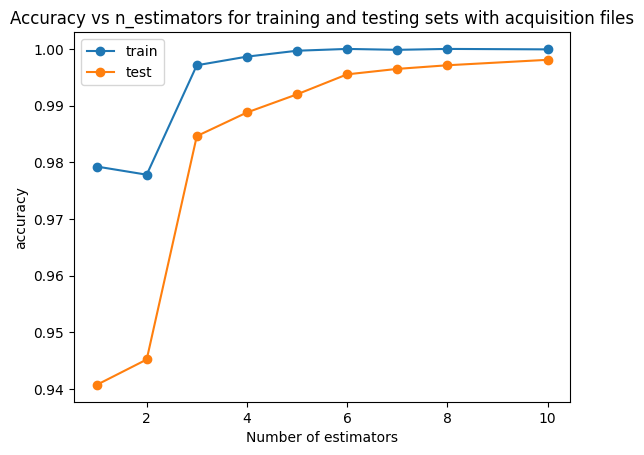

The best score is 0.998076923076923 for estimators = 10


In [179]:
#For acquisition files
S_train, S_test, classifiers = tune_estimators(features_array_acquisition, label_array_acquisition, features_mRMR_acquisition, estimators, N=Sample_acquisition)
estimators_opti_acquisition = plot_estimators(estimators, S_train, S_test, "acquisition")

In [180]:
estimators_opti_acquisition = 3

In [181]:
Sample_MI = features_array_MI.shape[0]
print(Sample_MI)

6240


Progress : 11%
Progress : 22%
Progress : 33%
Progress : 44%
Progress : 55%
Progress : 66%
Progress : 77%
Progress : 88%
Progress : 99%


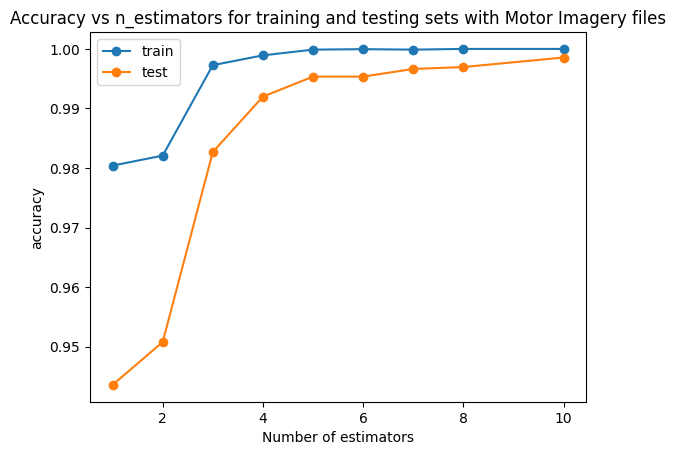

The best score is 0.9985576923076923 for estimators = 10


In [182]:
#For motor imagery files
S_train, S_test, classifiers = tune_estimators(features_array_MI, label_array_MI, features_mRMR_MI, estimators, N=Sample_MI)
estimators_opti_MI = plot_estimators(estimators, S_train, S_test, "Motor Imagery")

In [183]:
estimators_opti_MI = 3

Tune cost complexity pruning

In [184]:
dot = 10

#Grid of ccp_alphas for RandomForestClassifier
ccp_alphas = np.linspace(0, 0.020, dot)
#ccp_alphas = np.linspace(0.0125, 0.0275, dot)

#Grid of ccp_alphas
print(ccp_alphas)

[0.         0.00222222 0.00444444 0.00666667 0.00888889 0.01111111
 0.01333333 0.01555556 0.01777778 0.02      ]


In [185]:
def tune_alpha(x, y, features, ccp_alphas, estimators_opti=1, dot=dot, N=2000):
    
    #Calculate the number of features relevant in our case
    f = x.shape[1]

    S_train = []
    S_test  = []
    i=int(100/dot)
    classifiers = []

    #Separating the array into 5 buckets to perform 5-fold cross validation (but not random folds)
    buckets, buckets_label = subject_buckets(x, y, 5)

    for alpha in ccp_alphas:

        clf = RandomForestClassifier(n_estimators = estimators_opti, ccp_alpha=alpha)
        scores_train, scores_test, clfs = KFolding(buckets, buckets_label, clf, k=f, all_features=features, bins=5)
        
        classifiers.append(clfs)

        S_train.append(np.mean(scores_train))
        S_test.append(np.mean(scores_test))

        print(f"Progress : {i}%")
        i+=int(100/dot)

    return S_train, S_test, classifiers

In [186]:
def plot_alphas(ccp_alphas, S_train, S_test, filenames):
    fig, ax = plt.subplots()
    ax.set_xlabel("Value of ccp_alpha")
    ax.set_ylabel("accuracy")
    ax.set_title(f"Accuracy vs ccp_alphas for training and testing sets with {filenames} files")
    ax.plot(ccp_alphas, S_train, marker="o", linestyle="-", label="train")
    ax.plot(ccp_alphas, S_test, marker="o", linestyle="-", label="test")
    ax.legend()
    plt.show()

    alpha_opti = ccp_alphas[np.argmax(S_test)]

    print(f"The best score is {max(S_test)} for alpha = {alpha_opti}")
    
    return alpha_opti

Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


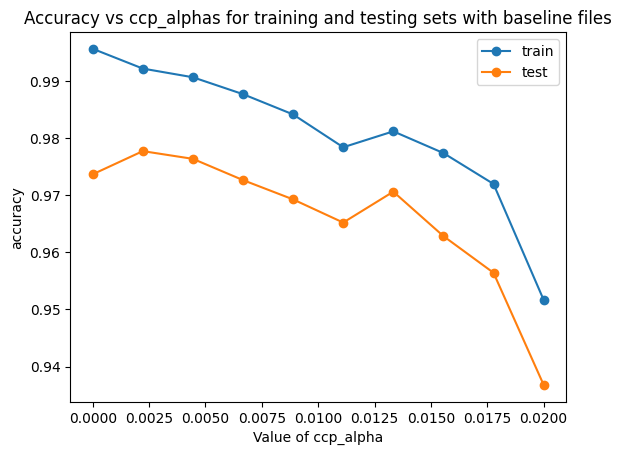

The best score is 0.9777027027027027 for alpha = 0.0022222222222222222


In [187]:
#For baseline files
S_train, S_test, classifiers = tune_alpha(features_array_baseline, label_array_baseline, features_mRMR_baseline, ccp_alphas, estimators_opti_baseline, N=Sample_baseline)
alpha_opti_baseline = plot_alphas(ccp_alphas, S_train, S_test, "baseline")

In [188]:
print(alpha_opti_baseline)

0.0022222222222222222


Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


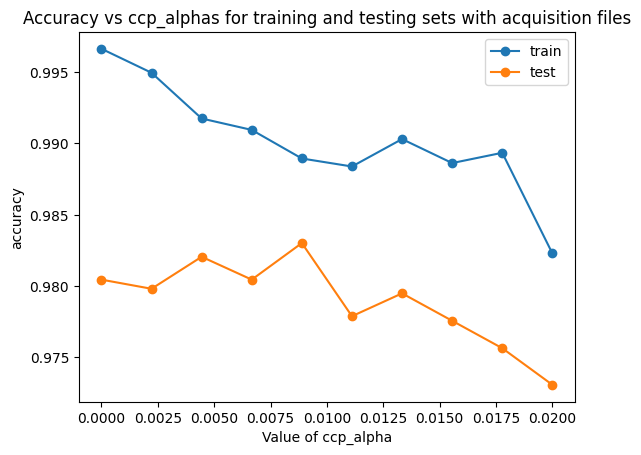

The best score is 0.9830128205128205 for alpha = 0.008888888888888889


In [189]:
#For acquisition files
S_train, S_test, classifiers = tune_alpha(features_array_acquisition, label_array_acquisition, features_mRMR_acquisition, ccp_alphas, estimators_opti_acquisition, N=Sample_acquisition)
alpha_opti_acquisition = plot_alphas(ccp_alphas, S_train, S_test, "acquisition")

In [190]:
print(alpha_opti_acquisition)

0.008888888888888889


Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


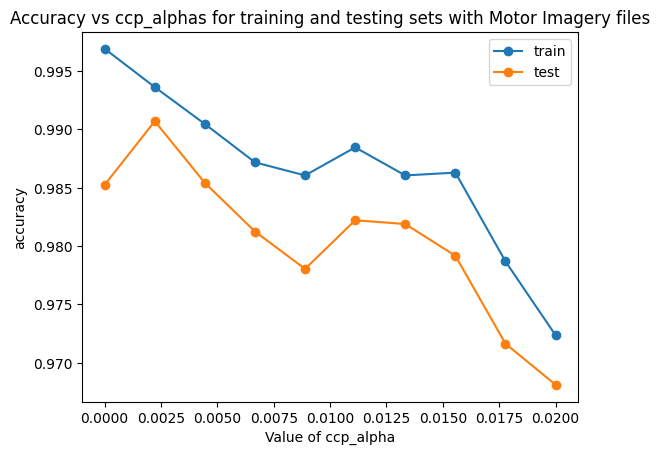

The best score is 0.9907051282051282 for alpha = 0.0022222222222222222


In [191]:
#For motor imagery files
S_train, S_test, classifiers = tune_alpha(features_array_MI, label_array_MI, features_mRMR_acquisition, ccp_alphas, estimators_opti_MI, N=Sample_MI)
alpha_opti_MI = plot_alphas(ccp_alphas, S_train, S_test, "Motor Imagery")

In [192]:
print(alpha_opti_MI)

0.0022222222222222222


Tune max_depth of every decision tree

Here we selected 3 trees which means :
$$
d = 3 \times x
$$
where x = number of leaves  
  
We remember that :
$$
f_{\text{max}} = \frac{N}{10 \times d}
$$

So if N_leaves = 25 :
$$
f_{\text{max}} = \frac{2960}{10 \times 3 \times 25}
$$

$$f_{\text{max}} = 3.94$$

So we will settle $$depth <= 10$$ to gain calculation time (depth = 10 is probably too much by the way)

In [193]:
dot = 10

#Grid of ccp_alphas for RandomForestClassifier
depths = np.linspace(1, 10, dot).astype(int)
print(depths)

[ 1  2  3  4  5  6  7  8  9 10]


In [194]:
def tune_depth(x, y, features, depths, estimators_opti=1, alpha_opti=0, dot=dot, N=2000):
    
    #Calculate the number of features relevant in our case
    f = int(N / (10*2))

    S_train = []
    S_test  = []
    i=int(100/dot)

    classifiers = []
    
    #Separating the array into 5 buckets to perform 5-fold cross validation (but not random folds)
    buckets, buckets_label = subject_buckets(x[x.columns[:]], y, 5)

    for depth in depths:
        
        clf = RandomForestClassifier(n_estimators = estimators_opti, ccp_alpha=alpha_opti, max_depth=depth)
        
        scores_train, scores_test, clfs = KFolding(buckets, buckets_label, clf, k=f, all_features=features, bins=5)

        classifiers.append(clfs)

        S_train.append(np.mean(scores_train))
        S_test.append(np.mean(scores_test))
        
        print(f"Progress : {i}%")
        i+=int(100/dot)
    
    return S_train, S_test, classifiers

In [195]:
def plot_depths(depths, S_train, S_test, filenames):
    
    fig, ax = plt.subplots()
    ax.set_xlabel("Depth of the trees")
    ax.set_ylabel("accuracy")
    ax.set_title(f"Accuracy vs max_depth for training and testing sets with {filenames} files")
    ax.plot(depths, S_train, marker="o", label="train", linestyle="-")
    ax.plot(depths, S_test, marker="o", label="test", linestyle="-")
    ax.legend()
    plt.show()

    depth_opti = depths[np.argmax(S_test)]

    print(f"The best score is {max(S_test)} for depth = {depth_opti}")

    return depth_opti

In [196]:
def features_per_classifier(classifiers, N = Sample_baseline):

    min_leave_depth = []
    
    for n in range(len(classifiers)):
    
        min_leave_fold = []
        
        for i in range(5):

            #Get number of leaves per tree
            min_leave = np.min([classifier.tree_.n_leaves for classifier in classifiers[n][i].estimators_])

            #Getting the minimum parameter
            min_leave_fold.append(min_leave)

        min_leave_depth.append(np.min(min_leave_fold))

    #We calculate the number of allowed features depending on the chosen depth
    f = []
    for i in range(len(min_leave_depth)):
        #f_max  = MAx number of features to avoid overfitting (number to leaves to estimate)
        f_max = N/(10*3*min_leave_depth[i])
        f_max = np.round(f_max, 2)
        f.append(f_max)
    
    return f

In [221]:
def depth_fmax(depths, n_features, filetype="baseline"):
    plt.title(f"Number of allowed features depending of the depth of every tree with {filetype} files")
    plt.plot(depths, n_features, 'o')
    plt.xlabel("Depths")
    plt.ylabel("Value of fmax")
    pass

Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


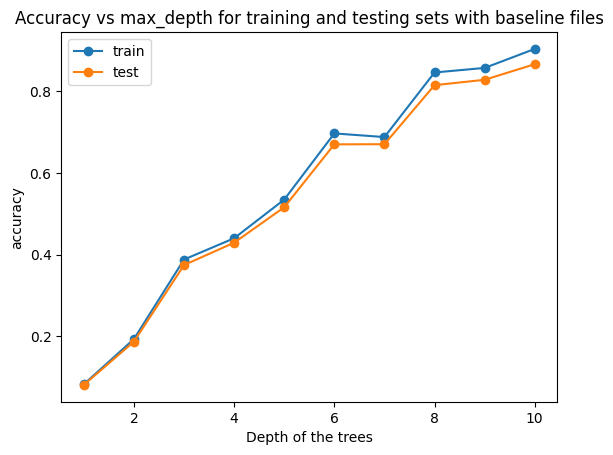

The best score is 0.8665540540540541 for depth = 10


In [222]:
#For baseline files
S_train, S_test, classifiers = tune_depth(features_array_baseline, label_array_baseline, features_mRMR_baseline, depths, estimators_opti_baseline, alpha_opti_baseline)
depth_opti_baseline = plot_depths(depths, S_train, S_test, "baseline")

Depths : [ 1  2  3  4  5  6  7  8  9 10]

Max features allowed :
[49.33, 32.89, 19.73, 14.1, 12.33, 6.58, 6.17, 3.95, 3.52, 3.52]


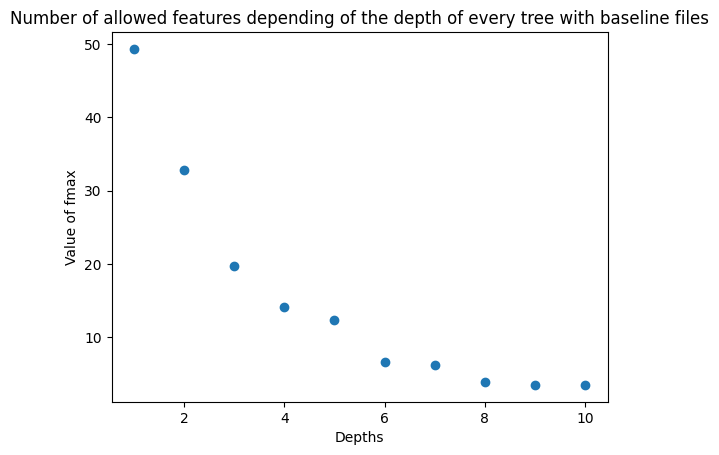

In [223]:
features = features_per_classifier(classifiers, Sample_baseline)
print(f"Depths : {depths}\n") 
print(f"Max features allowed :\n{features}")

depth_fmax(depths, features)
depth_opti_baseline = 4
f_max_baseline = features[3]

Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


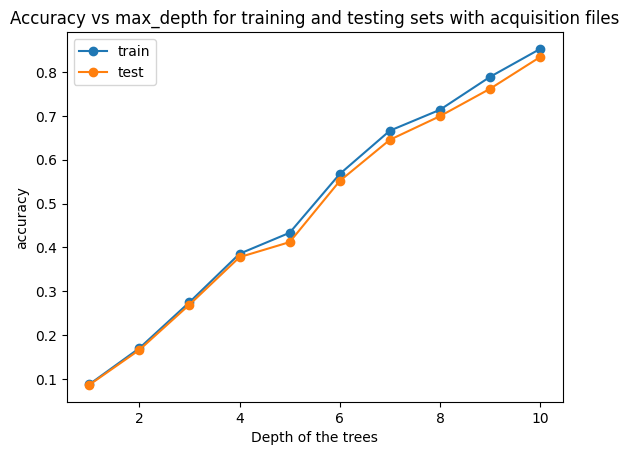

The best score is 0.8342948717948719 for depth = 10


In [224]:
#For acquisition files
S_train, S_test, classifiers = tune_depth(features_array_acquisition, label_array_acquisition, features_mRMR_acquisition, depths, estimators_opti_acquisition, alpha_opti_acquisition, N=Sample_acquisition)
depth_opti_acquisition = plot_depths(depths, S_train, S_test, "acquisition")

Depths : [ 1  2  3  4  5  6  7  8  9 10]

Max features allowed :
[52.0, 34.67, 26.0, 20.8, 13.0, 10.4, 9.45, 8.67, 6.12, 6.93]


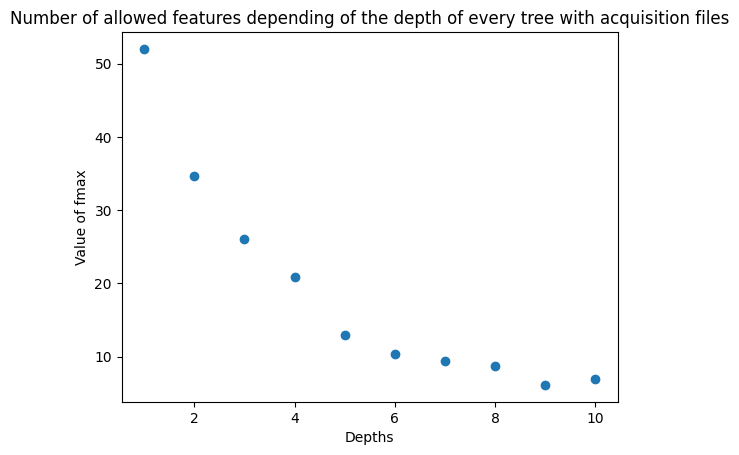

In [225]:
features = features_per_classifier(classifiers, Sample_acquisition)
print(f"Depths : {depths}\n") 
print(f"Max features allowed :\n{features}")

depth_fmax(depths, features, filetype='acquisition')
depth_opti_acquisition = 4
f_max_acquisition = features[3]

Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


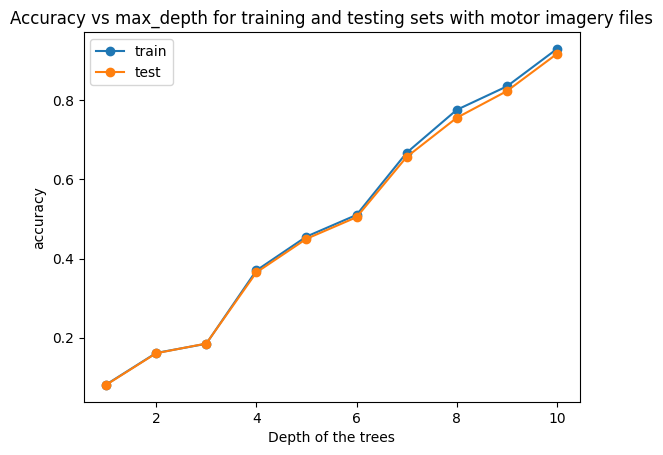

The best score is 0.9176282051282051 for depth = 10


In [226]:
#For motor imagery files
S_train, S_test, classifiers = tune_depth(features_array_MI, label_array_MI, features_mRMR_MI, depths, estimators_opti_MI, alpha_opti_MI, N=Sample_MI)
depth_opti_MI = plot_depths(depths, S_train, S_test, "motor imagery")

Depths : [ 1  2  3  4  5  6  7  8  9 10]

Max features allowed :
[104.0, 69.33, 52.0, 41.6, 29.71, 26.0, 18.91, 13.0, 10.95, 9.04]
[104.0, 69.33, 52.0, 41.6, 29.71, 26.0, 18.91, 13.0, 10.95, 9.04]


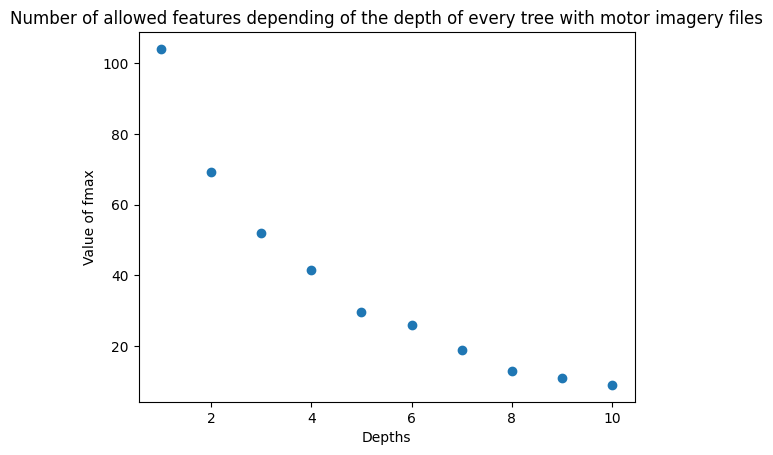

In [227]:
features = features_per_classifier(classifiers, Sample_MI)
print(f"Depths : {depths}\n") 
print(f"Max features allowed :\n{features}")

depth_fmax(depths, features, filetype='motor imagery')
depth_opti_MI = 7
f_max_MI = features[6]

In [54]:
def RF_features_score(x, y, mRMR_features, ranking_features, estimators=estimators_opti_MI, alpha=alpha_opti_MI, depth=depth_opti_MI, k=1, step=1):
    
    #S for scores, V for variance (std)
    Sm, Sr, Vm, Vr = [], [], [], []

    n_features = []

    mRMR_classifiers = []
    ranking_classifiers = []

    #We're using the best Classifier found
    clf = RandomForestClassifier(n_estimators = estimators, ccp_alpha = alpha, max_depth=depth)

    #Separating the data into 5 buckets
    buckets, buckets_label = subject_buckets(x, y, bins=5)
    
    #Doing the classification task on the most relevant PSD features
    for n in tqdm(range(1, k+1, step)):

        train_mRMR, test_mRMR, mRMR_clfs = KFolding(buckets, buckets_label, clf, all_features=mRMR_features, k=n, bins=5)
        train_ranking, test_ranking, ranking_clfs = KFolding(buckets, buckets_label, clf, all_features=ranking_features, k=n, bins=5)

        mRMR_classifiers.append(mRMR_clfs)
        ranking_classifiers.append(ranking_clfs)

        Sm.append(np.mean(test_mRMR))
        Vm.append(np.std(test_mRMR))

        Sr.append(np.mean(test_ranking))
        Vr.append(np.std(test_ranking))

        n_features.append(n)

    return Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers

In [65]:
def plot_accu(Sm, Sr, n_features, feature_type="Unknown", name="RandomForest"):

    plt.title(f"Performance of {name} based on best {feature_type} features")
    plt.plot(n_features, Sm, label="features mRMR")
    plt.plot(n_features, Sr, label="features ranking")
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy score")
    plt.legend()
    plt.xticks(range(min(n_features), max(n_features) + 1))
    plt.show()

    mRMR_opti = n_features[np.argmax(Sm)]
    ranking_opti = n_features[np.argmax(Sr)]

    print(f"Best score for mRMR : {np.max(Sm)} with {mRMR_opti} features")
    print(f"Best score for ranking : {np.max(Sr)} with {ranking_opti} features")
    return mRMR_opti, ranking_opti

In [56]:
def feature_importance(x, features, classifiers, k=10, all_folds=True, bins=5, method='mRMR'):

    #Getting the number of features in the classifier
    f = classifiers[0].n_features_in_

    #Getting all the features taken into account by all the folds (number >= f)
    features_flatten = unique_features(features, k=f)
    
    D_idx = {}
    for i in range(len(features_flatten)):
        D_idx[features_flatten[i]] = i

    n = len(features_flatten)

    if all_folds :

        importances = np.zeros((n,))
        
        for i in range(bins):

            clf = classifiers[i]

            #Getting the features analyzed on this fold
            index = features[i][:f]
            index = [D_idx[key] for key in index]

            #Feature_importances_ gives the mean impurity reduction for each feature (does not sum to 1)
            importances[index] += clf.feature_importances_
        
        #Calculating the mean of the importances array (divided by bins because we have bins folds)
        importances = importances / bins
        importances = importances.tolist()

        col_name = x.columns[features_flatten]
        
        #Storing features and their importance score in the dataframe (rows index = feature names, values = their score)
        df = pd.DataFrame({'col_name': importances}, index=col_name).sort_values(by='col_name', ascending=False)

        #Names of the k best features
        best_features = df.index.tolist()[:k]
        
        #Names of the columns of the k best features
        scores = df['col_name'].tolist()[:k]
        
        #Visualisation
        plt.figure(figsize=(k, 6))
        plt.barh(range(k), scores, align='center')
        plt.yticks(range(k), best_features)
        plt.xlabel('Importance')
        plt.title(f'Importance of {k} best {method} features')
        plt.show()

    if not all_folds:
        
        for i in range(5):
        
            clf = classifiers[i]

            #Figuring out every feature importance and transforming it into a list (usefull later)
            importances = clf.feature_importances_
            importances = importances.tolist()
        
            #Storing features and their importance score in the dataframe (rows index = feature names, values = their score)
            df = pd.DataFrame({'col_name': importances}, index=features).sort_values(by='col_name', ascending=False)
    
            #Names of the k best features
            features = df.index.tolist()[:k]
            
            #Names of the columns of the k best features
            scores = df['col_name'].tolist()[:k]
            
            #Visualisation
            plt.figure(figsize=(k, 6))
            plt.barh(range(k), scores, align='center')
            plt.yticks(range(k), features)
            plt.xlabel('Importance')
            plt.title(f'Importance of {k} best features')
            plt.show()
            
    return None

In [57]:
f_max_baseline = int(f_max_baseline)
f_max_acquisition = int(f_max_acquisition)
f_max_MI = int(f_max_MI)

PSD Features

In [58]:
print(f"Max features : {f_max_baseline}")

Max features : 14


100%|███████████████████████████████████████████| 14/14 [00:04<00:00,  3.39it/s]


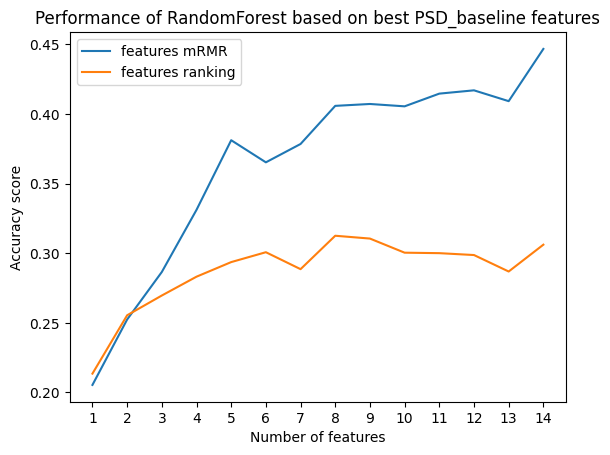

Best score for mRMR : 0.44662162162162156 with 14 features
Best score for ranking : 0.3125 with 8 features


In [59]:
#For baseline files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_PSD_baseline, label_array_baseline, PSD_mRMR_baseline, PSD_ranking_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, f_max_baseline, step=1)
RF_PSD_mRMR_baseline, RF_PSD_ranking_baseline = plot_accu(Sm, Sr, n_features, feature_type="PSD_baseline")

In [60]:
print('Features values', RF_PSD_mRMR_baseline, RF_PSD_ranking_baseline)

m, r = n_features.index(RF_PSD_mRMR_baseline), n_features.index(RF_PSD_ranking_baseline)
print('Index values', m, r)

Features values 14 8
Index values 13 7


In [61]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.043482761502061276
List of std ranking: 0.021286464867599147


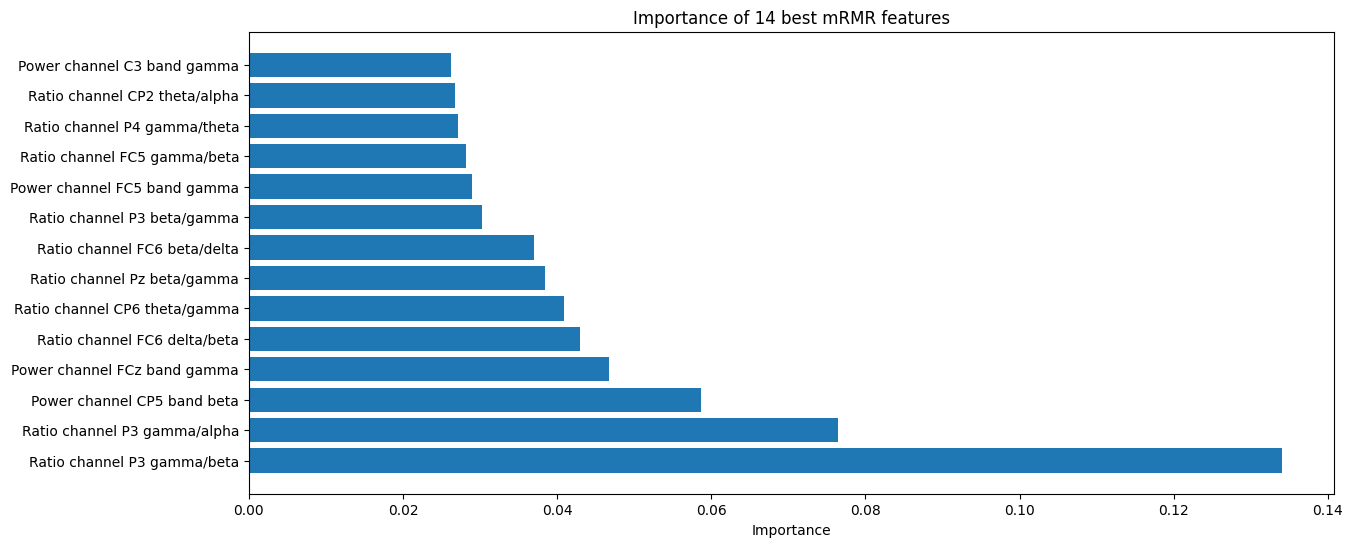

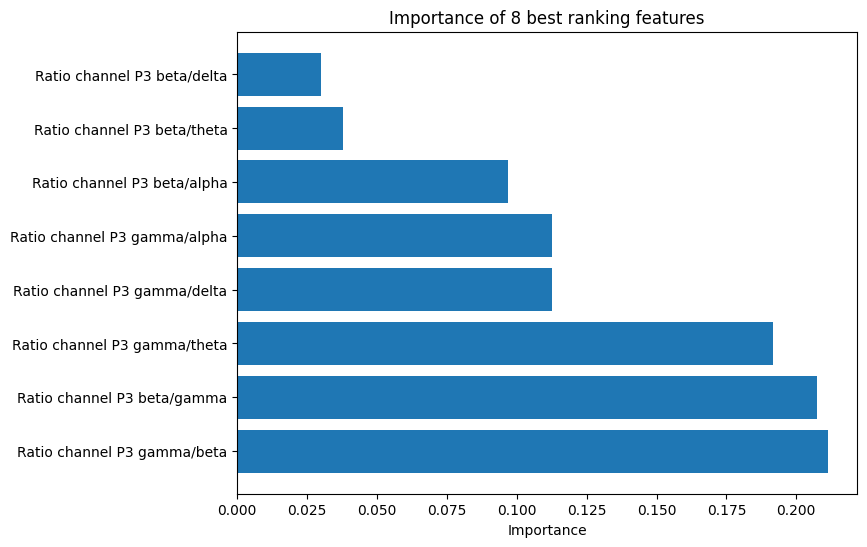

In [62]:
feature_importance(X_PSD_baseline, PSD_mRMR_baseline, mRMR_classifiers[m], k=m+1)
feature_importance(X_PSD_baseline, PSD_ranking_baseline, ranking_classifiers[r], k=r+1, method='ranking')

In [63]:
print(f"Max features : {f_max_acquisition}")

Max features : 17


100%|███████████████████████████████████████████| 17/17 [00:05<00:00,  3.06it/s]


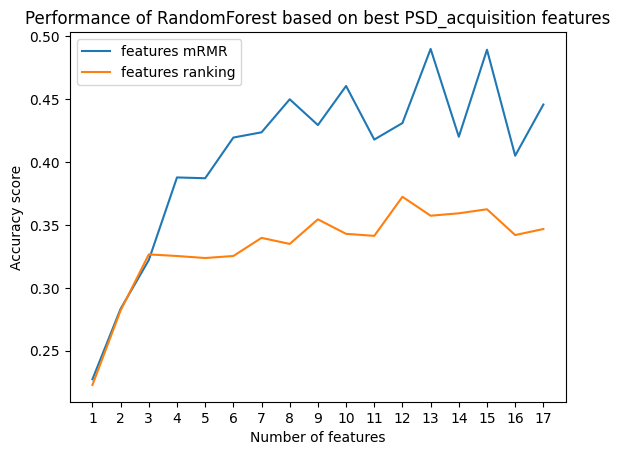

Best score for mRMR : 0.49006410256410254 with 13 features
Best score for ranking : 0.37243589743589745 with 12 features


In [64]:
#For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_PSD_acquisition, label_array_acquisition, PSD_mRMR_acquisition, PSD_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, f_max_acquisition, step=1)
RF_PSD_mRMR_acquisition, RF_PSD_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="PSD_acquisition")

In [65]:
print('Features values', RF_PSD_mRMR_acquisition, RF_PSD_ranking_acquisition)

m, r = n_features.index(RF_PSD_mRMR_acquisition), n_features.index(RF_PSD_ranking_acquisition)
print('Index values', m, r)

Features values 13 12
Index values 12 11


In [66]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.06043515496209612
List of std ranking: 0.01260230977649839


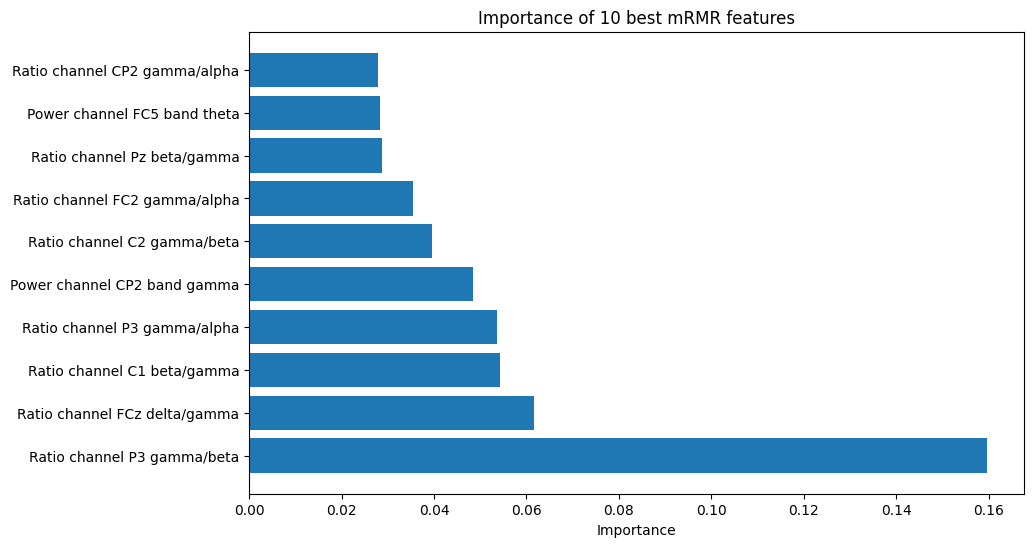

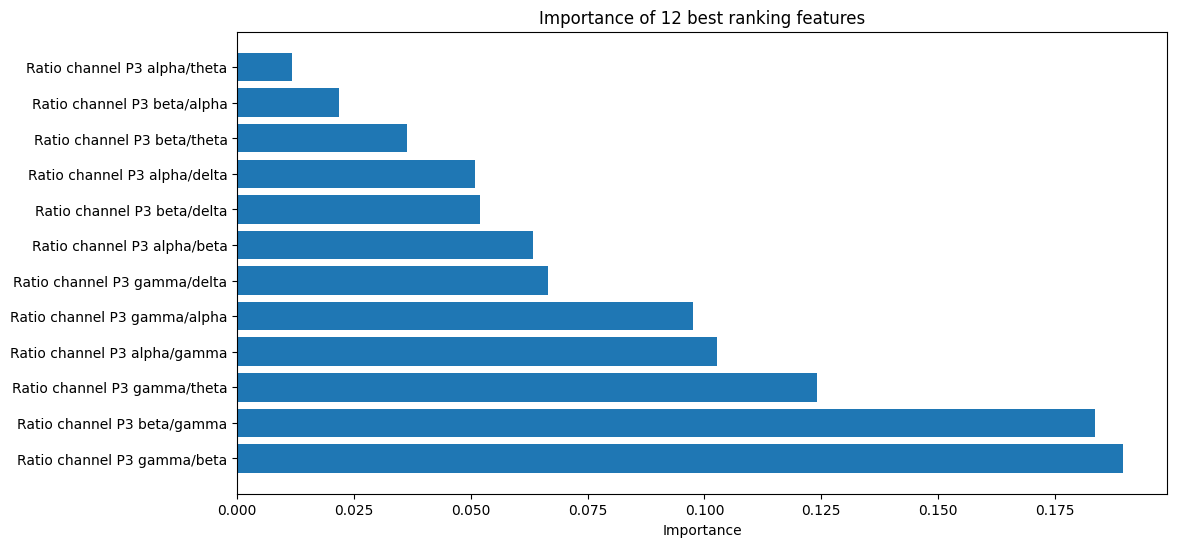

In [67]:
feature_importance(X_PSD_acquisition, PSD_mRMR_acquisition, mRMR_classifiers[m])
feature_importance(X_PSD_acquisition, PSD_ranking_acquisition, ranking_classifiers[r], k=r+1, method='ranking')

In [68]:
print(f"Max features : {f_max_MI}")

Max features : 16


100%|███████████████████████████████████████████| 16/16 [00:10<00:00,  1.53it/s]


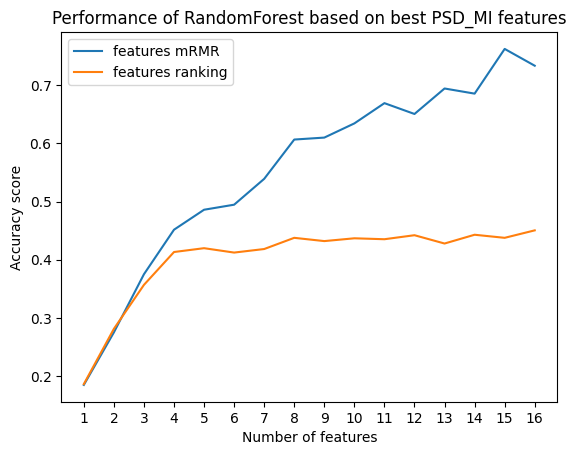

Best score for mRMR : 0.7620192307692308 with 15 features
Best score for ranking : 0.45048076923076924 with 16 features


In [69]:
#For motor imagery files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_PSD_MI, label_array_MI, PSD_mRMR_MI, PSD_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, f_max_MI)
RF_PSD_mRMR_MI, RF_PSD_ranking_MI =plot_accu(Sm, Sr, n_features, feature_type="PSD_MI")

In [70]:
print('Features values', RF_PSD_mRMR_MI, RF_PSD_ranking_MI)

m, r = n_features.index(RF_PSD_mRMR_MI), n_features.index(RF_PSD_ranking_MI)
print('Index values', m, r)

Features values 15 16
Index values 14 15


In [71]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.042770751640855406
List of std ranking: 0.011627152017446836


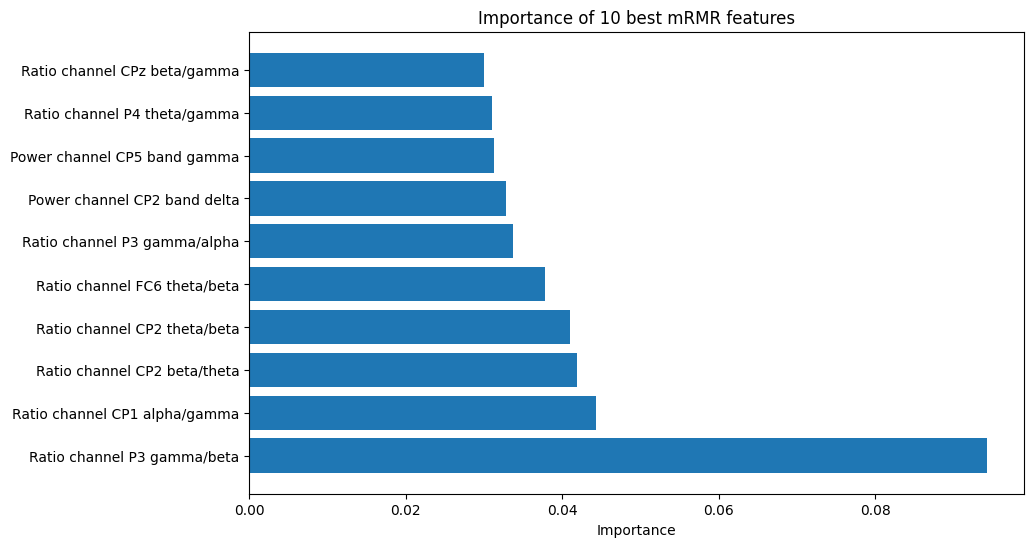

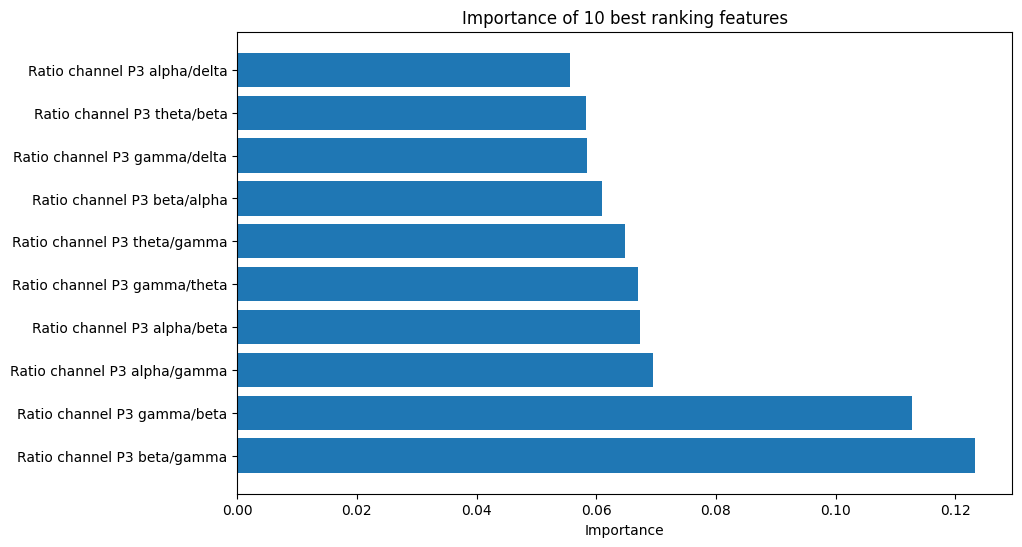

In [72]:
feature_importance(X_PSD_MI, PSD_mRMR_MI, mRMR_classifiers[m])
feature_importance(X_PSD_MI, PSD_ranking_MI, ranking_classifiers[r], method='ranking')

Coherence Features

In [73]:
#Grid
k = len(X_COH_baseline.columns.tolist())

100%|███████████████████████████████████████████| 14/14 [00:06<00:00,  2.01it/s]


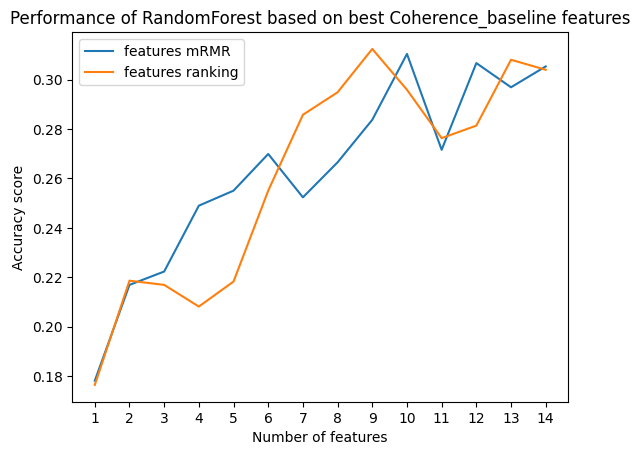

Best score for mRMR : 0.310472972972973 with 10 features
Best score for ranking : 0.31250000000000006 with 9 features


In [74]:
#For baseline files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_COH_baseline, label_array_baseline, COH_mRMR_baseline, COH_ranking_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, f_max_baseline) 
RF_COH_mRMR_baseline, RF_COH_ranking_baseline = plot_accu(Sm, Sr, n_features, feature_type="Coherence_baseline")

In [75]:
print('Features values', RF_COH_mRMR_baseline, RF_COH_ranking_baseline)

m, r = n_features.index(RF_COH_mRMR_baseline), n_features.index(RF_COH_ranking_baseline)
print('Index values', m, r)

Features values 10 9
Index values 9 8


In [76]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.04568187228077128
List of std ranking: 0.010736654447345057


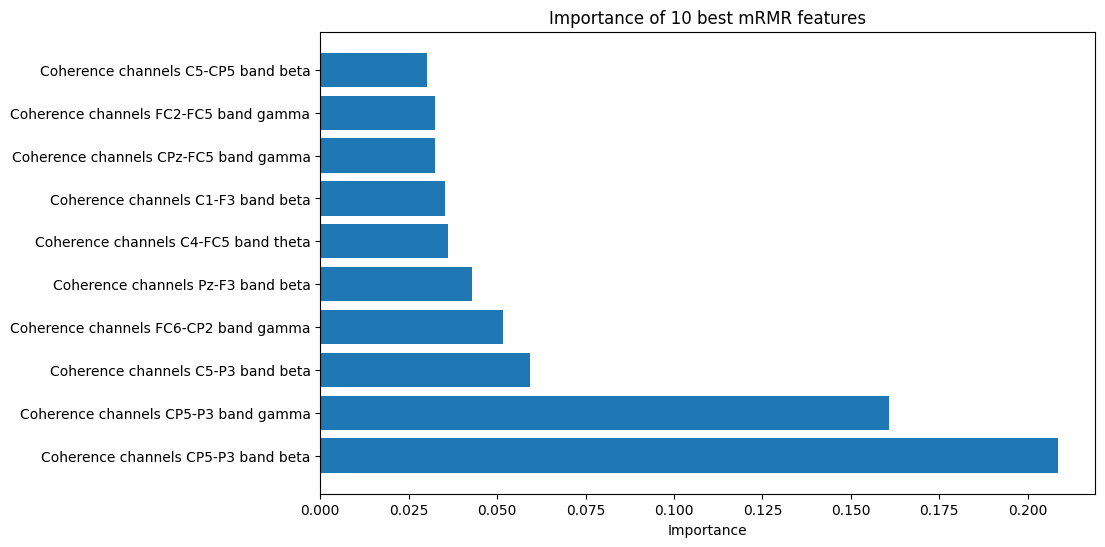

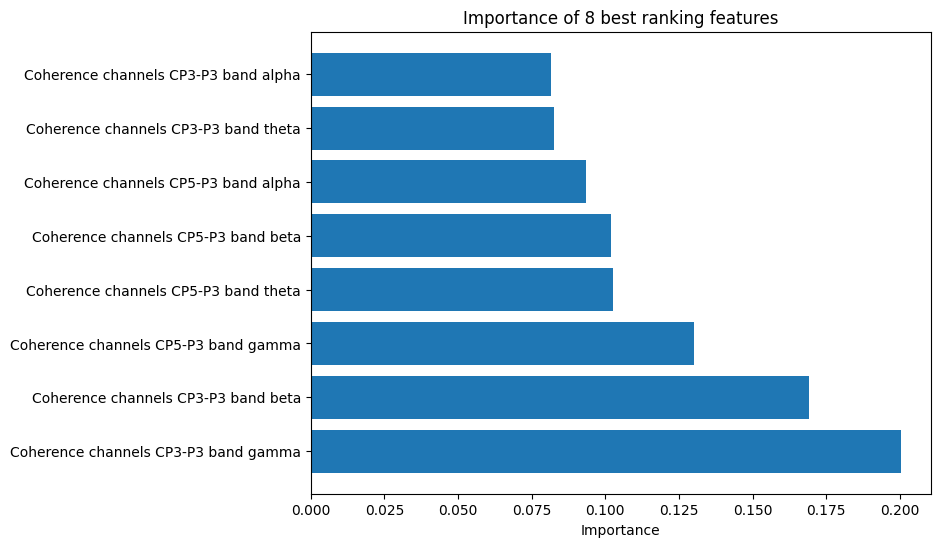

In [78]:
feature_importance(X_COH_baseline, COH_mRMR_baseline, mRMR_classifiers[m])
feature_importance(X_COH_baseline, COH_ranking_baseline, ranking_classifiers[r], method='ranking', k=r)

100%|███████████████████████████████████████████| 17/17 [00:08<00:00,  1.91it/s]


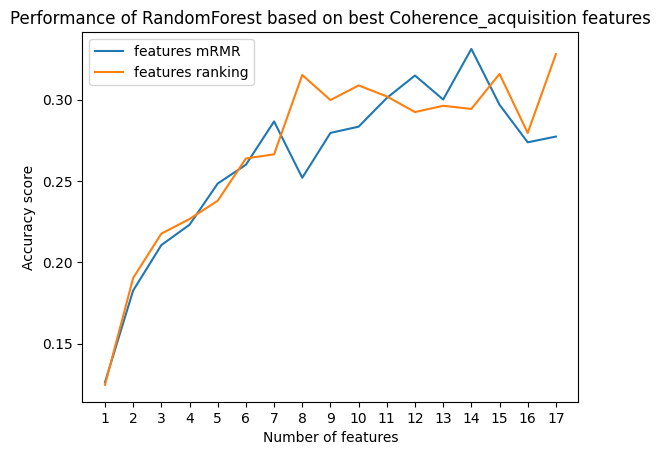

Best score for mRMR : 0.3310897435897436 with 14 features
Best score for ranking : 0.3278846153846154 with 17 features


In [79]:
#For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_COH_acquisition, label_array_acquisition, COH_mRMR_acquisition, COH_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, f_max_acquisition) 
RF_COH_mRMR_acquisition, RF_COH_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="Coherence_acquisition")

In [80]:
print('Features values', RF_COH_mRMR_acquisition, RF_COH_ranking_acquisition)

m, r = n_features.index(RF_COH_mRMR_acquisition), n_features.index(RF_COH_ranking_acquisition)
print('Index values', m, r)

Features values 14 17
Index values 13 16


In [81]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.04926522899205595
List of std ranking: 0.03892086832016378


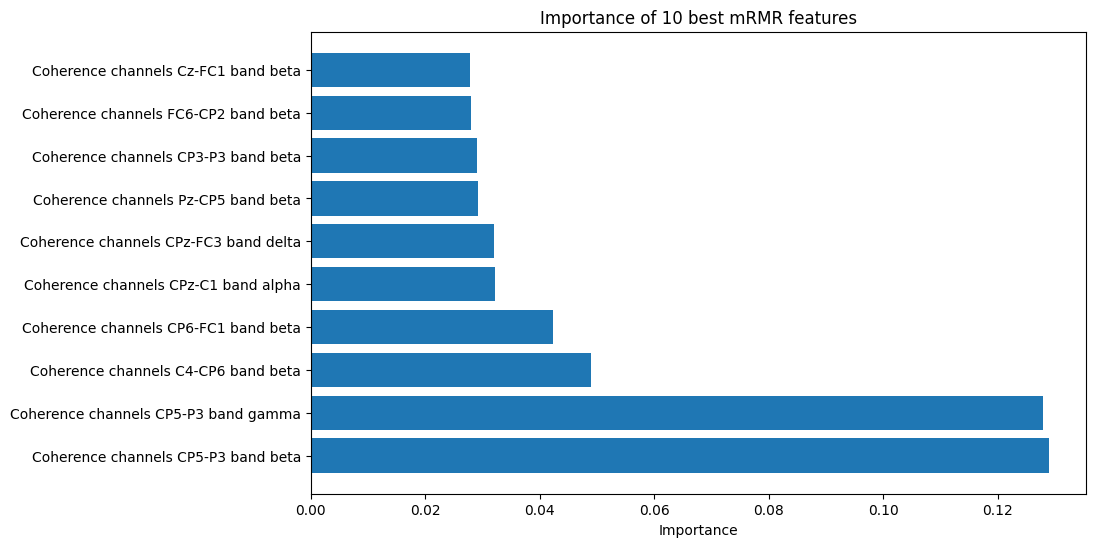

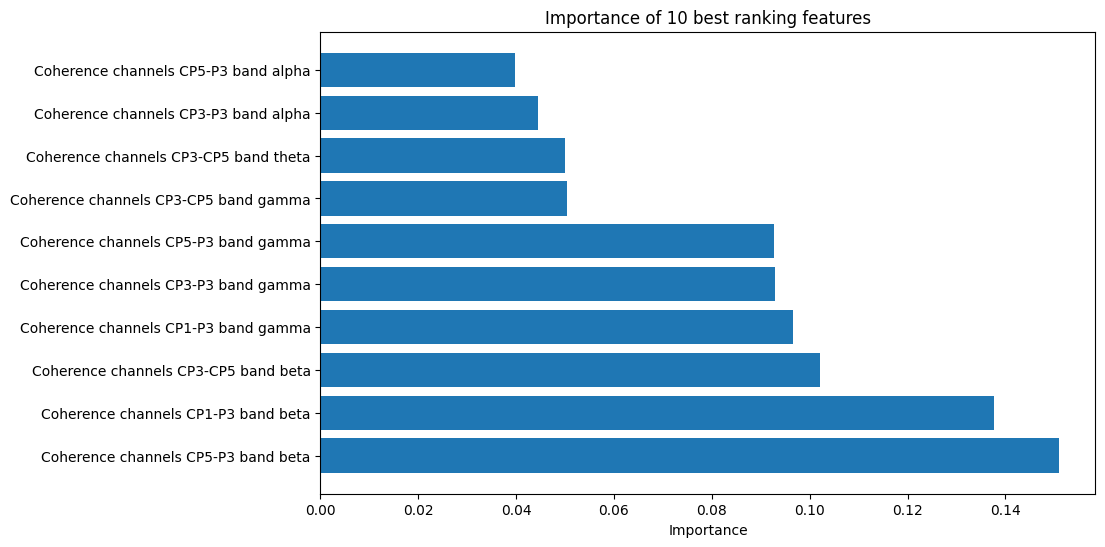

In [82]:
feature_importance(X_COH_acquisition, COH_mRMR_acquisition, mRMR_classifiers[m])
feature_importance(X_COH_acquisition, COH_ranking_acquisition, ranking_classifiers[r], method='ranking')

100%|███████████████████████████████████████████| 16/16 [00:20<00:00,  1.27s/it]


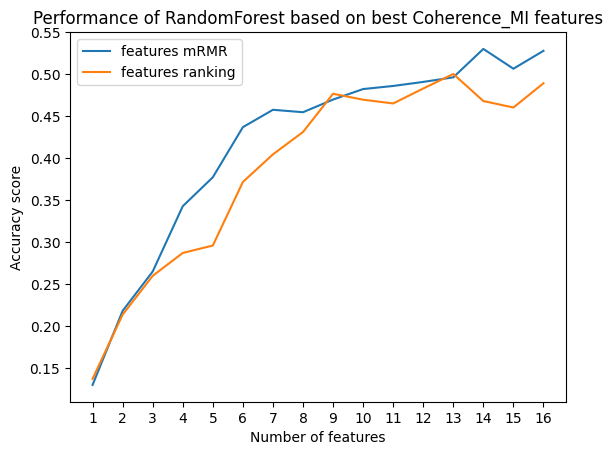

Best score for mRMR : 0.5301282051282051 with 14 features
Best score for ranking : 0.5003205128205128 with 13 features


In [83]:
#For motor imagery files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_COH_MI, label_array_MI, COH_mRMR_MI, COH_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, f_max_MI) 
RF_COH_mRMR_MI, RF_COH_ranking_MI = plot_accu(Sm, Sr, n_features, feature_type="Coherence_MI")

In [84]:
print('Features values', RF_COH_mRMR_MI, RF_COH_ranking_MI)

m, r = n_features.index(RF_COH_mRMR_MI), n_features.index(RF_COH_ranking_MI)
print('Index values', m, r)

Features values 14 13
Index values 13 12


In [85]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.014780124743806184
List of std ranking: 0.013356196497445282


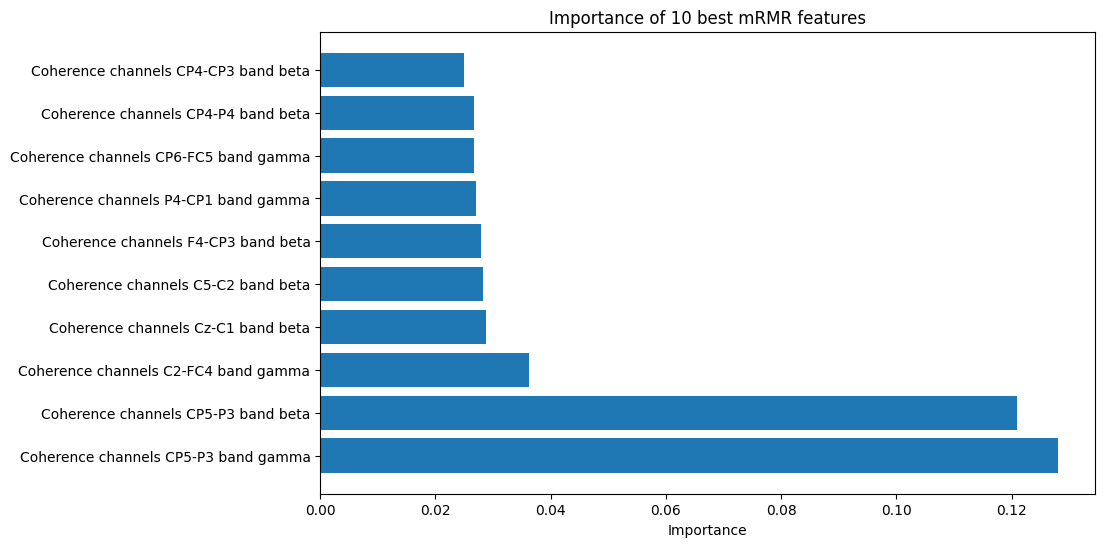

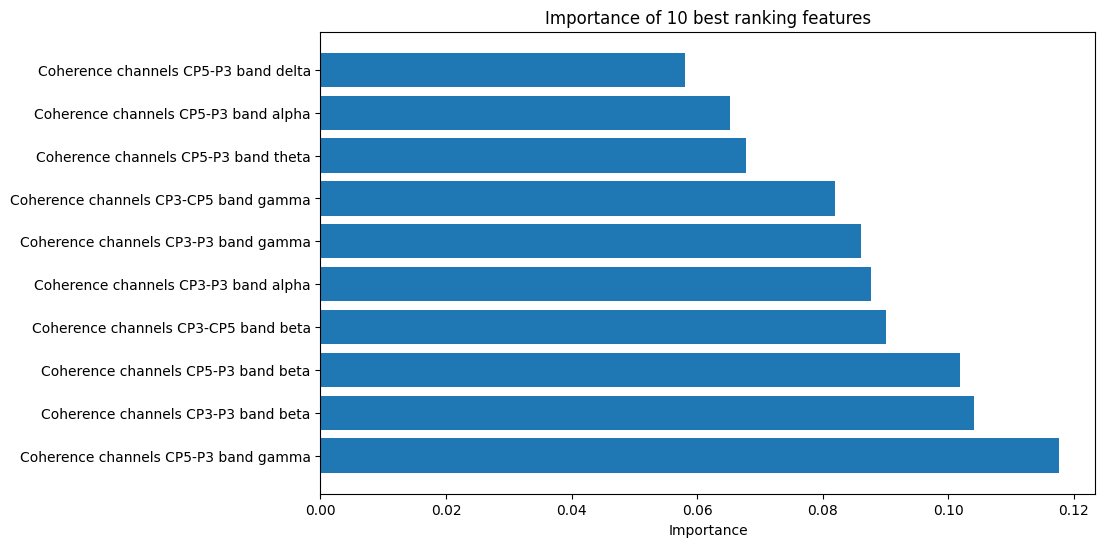

In [86]:
feature_importance(X_COH_MI, COH_mRMR_MI, mRMR_classifiers[m])
feature_importance(X_COH_MI, COH_ranking_MI, ranking_classifiers[r], method='ranking')

CSP Features

100%|█████████████████████████████████████████████| 6/6 [00:01<00:00,  5.91it/s]


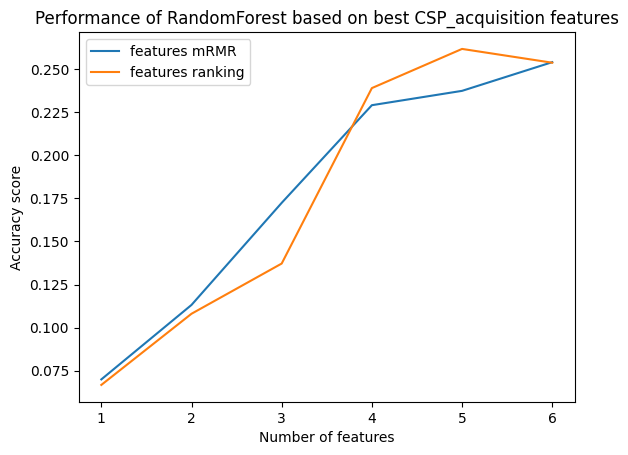

Best score for mRMR : 0.25416666666666665 with 6 features
Best score for ranking : 0.2618589743589744 with 5 features


In [87]:
#For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_CSP_acquisition, label_array_acquisition, CSP_mRMR_acquisition, CSP_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k=6)
RF_CSP_mRMR_acquisition, RF_CSP_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="CSP_acquisition")

In [88]:
print('Features values', RF_CSP_mRMR_acquisition, RF_CSP_ranking_acquisition)

m, r = n_features.index(RF_CSP_mRMR_acquisition), n_features.index(RF_CSP_ranking_acquisition)
print('Index values', m, r)

Features values 6 5
Index values 5 4


In [89]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.026266411857112655
List of std ranking: 0.014916764459256542


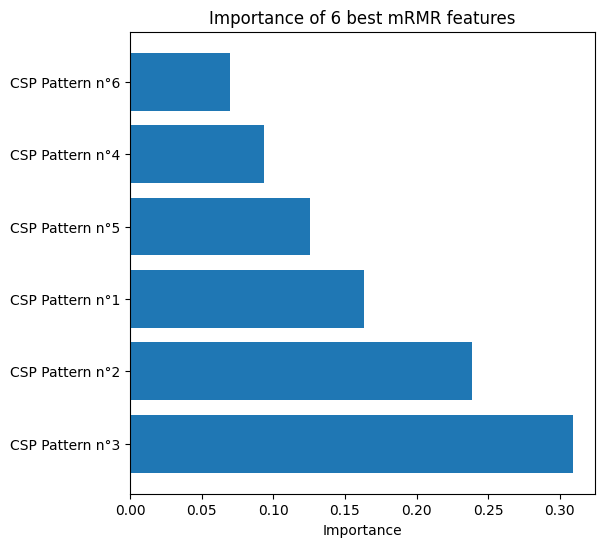

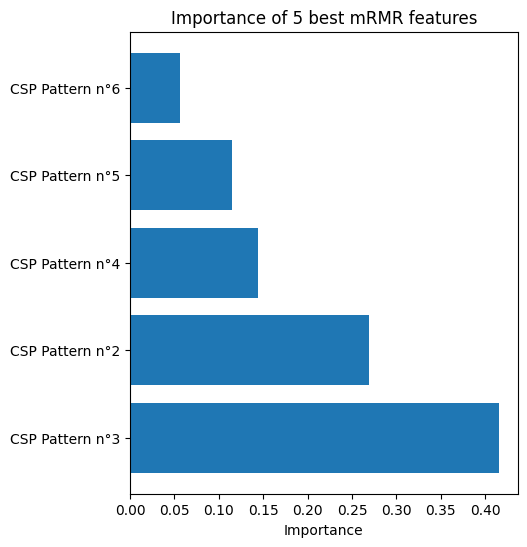

In [90]:
feature_importance(X_CSP_acquisition, CSP_mRMR_acquisition, mRMR_classifiers[m], k=m+1)
feature_importance(X_CSP_acquisition, CSP_ranking_acquisition, ranking_classifiers[r], k=r+1)

100%|█████████████████████████████████████████████| 6/6 [00:02<00:00,  2.93it/s]


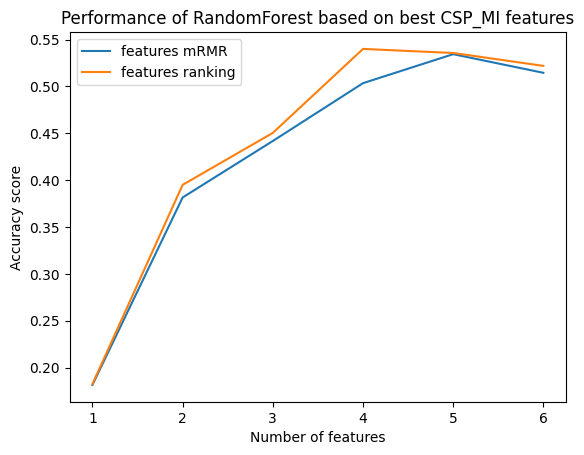

Best score for mRMR : 0.5344551282051283 with 5 features
Best score for ranking : 0.5400641025641025 with 4 features


In [91]:
# For MI files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_CSP_MI, label_array_MI, CSP_mRMR_MI, CSP_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k=6)
RF_CSP_mRMR_MI, RF_CSP_ranking_MI = plot_accu(Sm, Sr, n_features, feature_type="CSP_MI")

In [92]:
print('Features values', RF_CSP_mRMR_MI, RF_CSP_ranking_MI)

m, r = n_features.index(RF_CSP_mRMR_MI), n_features.index(RF_CSP_ranking_MI)
print('Index values', m, r)

Features values 5 4
Index values 4 3


In [93]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.025444963554360014
List of std ranking: 0.018384141538076895


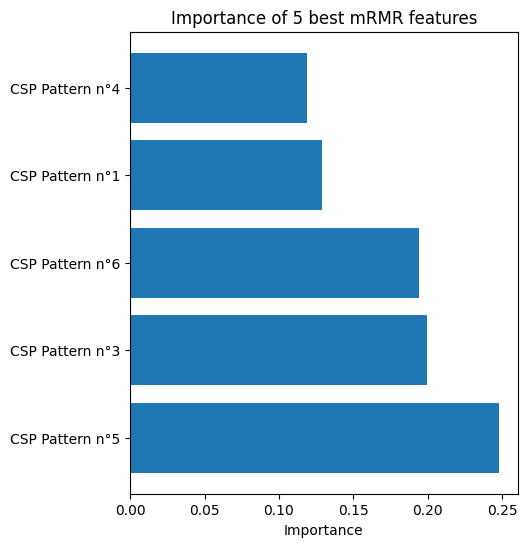

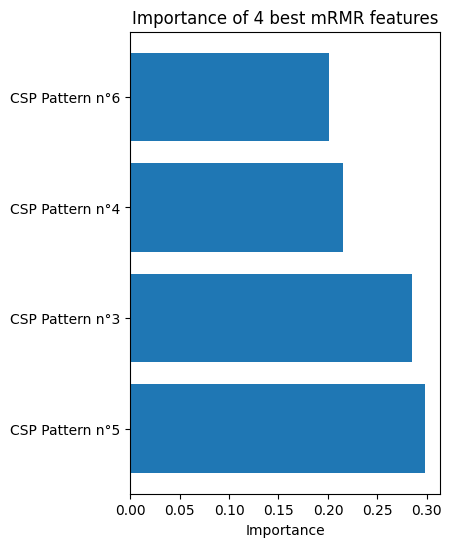

In [94]:
feature_importance(X_CSP_MI, CSP_mRMR_MI, mRMR_classifiers[m], k=m+1)
feature_importance(X_CSP_MI, CSP_ranking_MI, ranking_classifiers[r], k=r+1)

IHAR Features

100%|███████████████████████████████████████████| 11/11 [00:02<00:00,  5.10it/s]


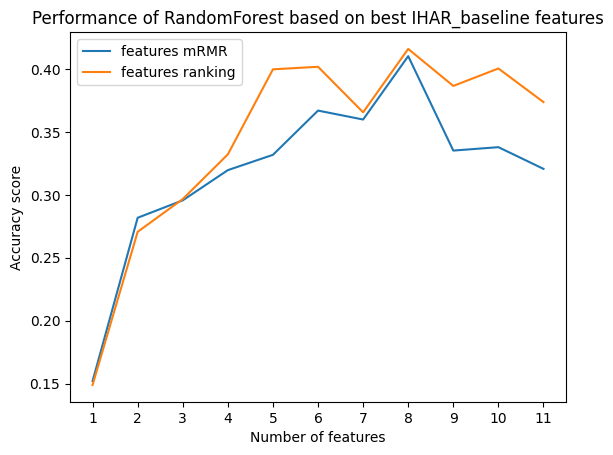

Best score for mRMR : 0.41013513513513516 with 8 features
Best score for ranking : 0.41587837837837843 with 8 features


In [95]:
# For baseline files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_IHAR_baseline, label_array_baseline, IHAR_mRMR_baseline, IHAR_ranking_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, k=11) 
RF_IHAR_mRMR_baseline, RF_IHAR_ranking_baseline = plot_accu(Sm, Sr, n_features, feature_type="IHAR_baseline")

In [96]:
print('Features values', RF_IHAR_mRMR_baseline, RF_IHAR_ranking_baseline)

m, r = n_features.index(RF_IHAR_mRMR_baseline), n_features.index(RF_IHAR_ranking_baseline)
print('Index values', m, r)

Features values 8 8
Index values 7 7


In [97]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.03164514601985539
List of std ranking: 0.034276807927867


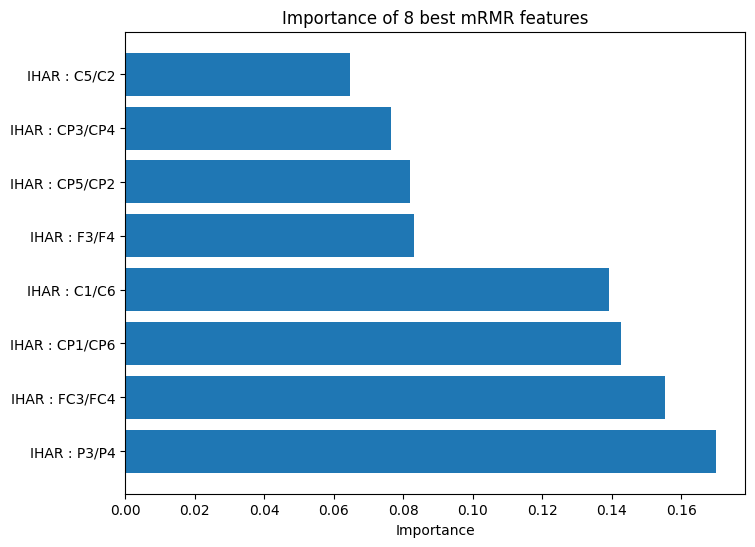

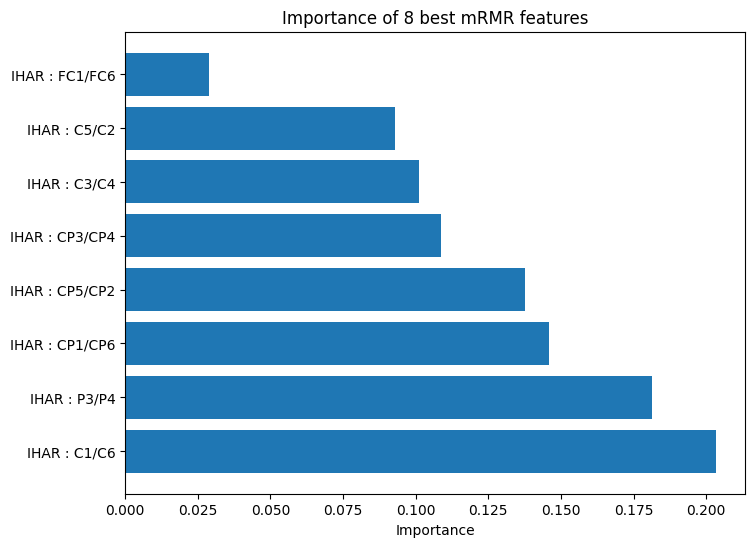

In [98]:
feature_importance(X_IHAR_baseline, IHAR_mRMR_baseline, mRMR_classifiers[m], k=m+1)
feature_importance(X_IHAR_baseline, IHAR_ranking_baseline, ranking_classifiers[r], k=r+1)

100%|███████████████████████████████████████████| 11/11 [00:02<00:00,  4.85it/s]


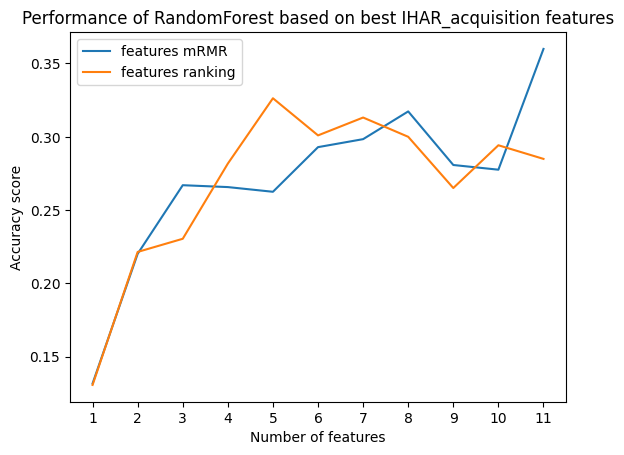

Best score for mRMR : 0.35993589743589743 with 11 features
Best score for ranking : 0.32628205128205134 with 5 features


In [99]:
# For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_IHAR_acquisition, label_array_acquisition, IHAR_mRMR_acquisition, IHAR_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k=11) 
RF_IHAR_mRMR_acquisition, RF_IHAR_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="IHAR_acquisition")

In [100]:
print('Features values', RF_IHAR_mRMR_acquisition, RF_IHAR_ranking_acquisition)

m, r = n_features.index(RF_IHAR_mRMR_acquisition), n_features.index(RF_IHAR_ranking_acquisition)
print('Index values', m, r)

Features values 11 5
Index values 10 4


In [101]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.03771443184636027
List of std ranking: 0.03426040683734056


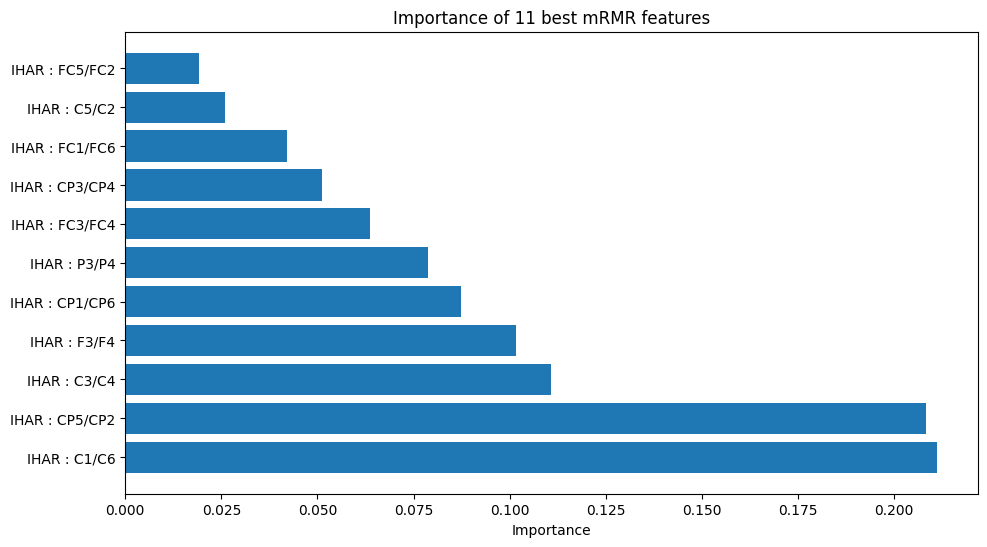

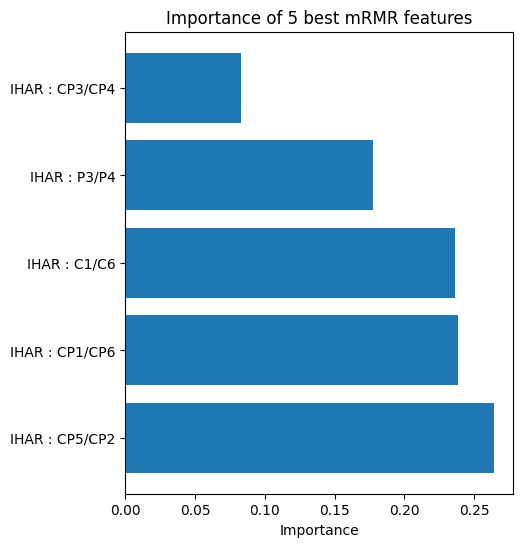

In [102]:
feature_importance(X_IHAR_acquisition, IHAR_mRMR_acquisition, mRMR_classifiers[m], k=m+1)
feature_importance(X_IHAR_acquisition, IHAR_ranking_acquisition, ranking_classifiers[r], k=r+1)

100%|███████████████████████████████████████████| 11/11 [00:04<00:00,  2.54it/s]


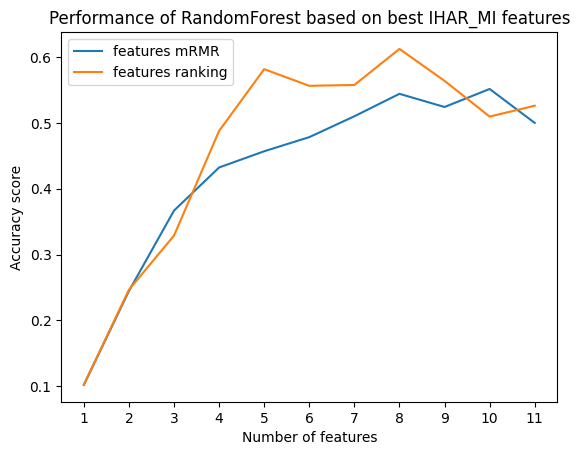

Best score for mRMR : 0.5517628205128206 with 10 features
Best score for ranking : 0.6126602564102563 with 8 features


In [103]:
#For Motor imagery files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = RF_features_score(X_IHAR_MI, label_array_MI, IHAR_mRMR_MI, IHAR_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k=11, step=1) 
RF_IHAR_mRMR_MI, RF_IHAR_ranking_MI = plot_accu(Sm, Sr, n_features, feature_type="IHAR_MI")

In [104]:
print('Features values', RF_IHAR_mRMR_MI, RF_IHAR_ranking_MI)

m, r = n_features.index(RF_IHAR_mRMR_MI), n_features.index(RF_IHAR_ranking_MI)
print('Index values', m, r)

Features values 10 8
Index values 9 7


In [105]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.04067041220989548
List of std ranking: 0.03584732078728563


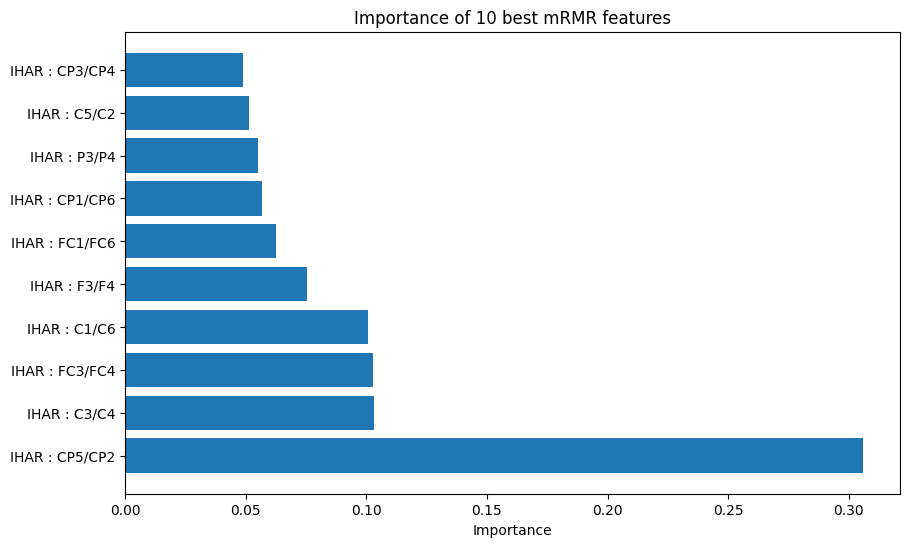

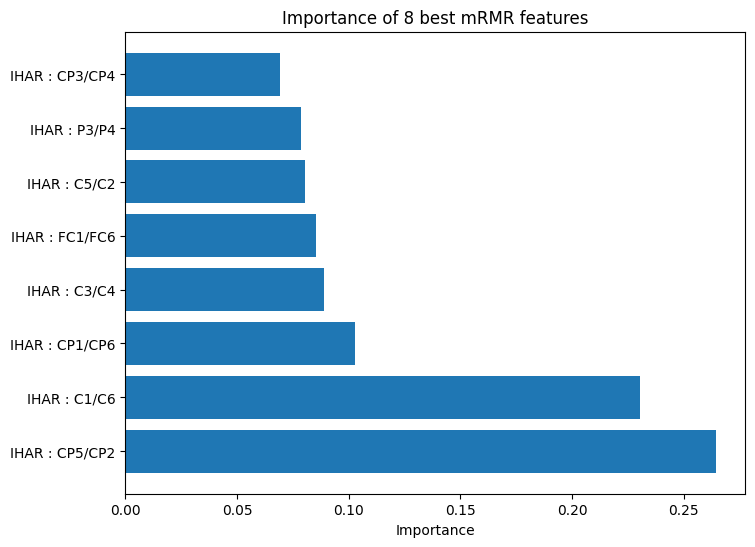

In [106]:
feature_importance(X_IHAR_MI, IHAR_mRMR_MI, mRMR_classifiers[m], k=m+1)
feature_importance(X_IHAR_MI, IHAR_ranking_MI, ranking_classifiers[r], k=r+1)

Concatenate best features (with RandomForest) into arrays

In [107]:
#Function to retrieve the global index corresponding to every local index
def adjust_index(df, DF, features_mRMR, features_ranking):
    #df = the dataframe containing the feature_type
    #DF = the full dataframe
    #features shape = (5, #features)

    features_mRMR_corrected = features_mRMR.copy().astype(object)
    features_ranking_corrected = features_ranking.copy().astype(object)

    #Retrieving features_name
    for i in range(5):
        features_mRMR_corrected[i] = df.columns[features_mRMR[i]]
        features_ranking_corrected[i] = df.columns[features_ranking[i]]

    
    #Dictionnary to retrieve the correct index in the full dataframe
    D = {}
    i=0
    for name in DF.columns:

        D[name] = i
        i+=1

    for i in range(5):
        for j in range(len(features_mRMR[0])):
            features_mRMR_corrected[i, j] = D[features_mRMR_corrected[i, j]]

        for j in range(len(features_ranking[0])):
            features_ranking_corrected[i, j] = D[features_ranking_corrected[i, j]]
                                          
    
    return features_mRMR_corrected.astype(int), features_ranking_corrected.astype(int)

In [108]:
#Finding all the features selected by both methods :

#PSD
best_PSD_mRMR_baseline = PSD_mRMR_baseline[:, :RF_PSD_mRMR_baseline]
best_PSD_ranking_baseline = PSD_ranking_baseline[:, :RF_PSD_ranking_baseline]

best_PSD_mRMR_baseline, best_PSD_ranking_baseline = adjust_index(X_PSD_baseline, features_array_baseline, best_PSD_mRMR_baseline, best_PSD_ranking_baseline)

#COH
best_COH_mRMR_baseline = COH_mRMR_baseline[:, :RF_COH_mRMR_baseline]
best_COH_ranking_baseline = COH_ranking_baseline[:, :RF_COH_ranking_baseline]

best_COH_mRMR_baseline, best_COH_ranking_baseline = adjust_index(X_COH_baseline, features_array_baseline, best_COH_mRMR_baseline, best_COH_ranking_baseline)

#IHAR
best_IHAR_mRMR_baseline = IHAR_mRMR_baseline[:, :RF_IHAR_mRMR_baseline]
best_IHAR_ranking_baseline = IHAR_ranking_baseline[:, :RF_IHAR_ranking_baseline]

best_IHAR_mRMR_baseline, best_IHAR_ranking_baseline = adjust_index(X_IHAR_baseline, features_array_baseline, best_IHAR_mRMR_baseline, best_IHAR_ranking_baseline)


#The full array
best_features_mRMR_baseline = np.concatenate((best_PSD_mRMR_baseline, best_COH_mRMR_baseline, best_IHAR_mRMR_baseline), axis=1)
best_features_ranking_baseline = np.concatenate((best_PSD_ranking_baseline, best_COH_ranking_baseline, best_IHAR_ranking_baseline), axis=1)
print(f"Best features mRMR folds shape : {best_features_mRMR_baseline.shape}\nBest features ranking folds shape :{best_features_ranking_baseline.shape}")

Best features mRMR folds shape : (5, 32)
Best features ranking folds shape :(5, 25)


In [109]:
#Finding all the features selected by both methods :

#PSD
best_PSD_mRMR_acquisition = PSD_mRMR_acquisition[:, :RF_PSD_mRMR_acquisition]
best_PSD_ranking_acquisition = PSD_ranking_acquisition[:, :RF_PSD_ranking_acquisition]

best_PSD_mRMR_acquisition, best_PSD_ranking_acquisition = adjust_index(X_PSD_acquisition, features_array_acquisition, best_PSD_mRMR_acquisition, best_PSD_ranking_acquisition)

#COH
best_COH_mRMR_acquisition = COH_mRMR_acquisition[:, :RF_COH_mRMR_acquisition]
best_COH_ranking_acquisition = COH_ranking_acquisition[:, :RF_COH_ranking_acquisition]

best_COH_mRMR_acquisition, best_COH_ranking_acquisition = adjust_index(X_COH_acquisition, features_array_acquisition, best_COH_mRMR_acquisition, best_COH_ranking_acquisition)

#CSP
best_CSP_mRMR_acquisition = CSP_mRMR_acquisition[:, :RF_CSP_mRMR_acquisition]
best_CSP_ranking_acquisition = CSP_ranking_acquisition[:, :RF_CSP_ranking_acquisition]

best_CSP_mRMR_acquisition, best_CSP_ranking_acquisition = adjust_index(X_CSP_acquisition, features_array_acquisition, best_CSP_mRMR_acquisition, best_CSP_ranking_acquisition)

#IHAR
best_IHAR_mRMR_acquisition = IHAR_mRMR_acquisition[:, :RF_IHAR_mRMR_acquisition]
best_IHAR_ranking_acquisition = IHAR_ranking_acquisition[:, :RF_IHAR_ranking_acquisition]

best_IHAR_mRMR_acquisition, best_IHAR_ranking_acquisition = adjust_index(X_IHAR_acquisition, features_array_acquisition, best_IHAR_mRMR_acquisition, best_IHAR_ranking_acquisition)


#The full array
best_features_mRMR_acquisition = np.concatenate((best_PSD_mRMR_acquisition, best_COH_mRMR_acquisition, best_CSP_mRMR_acquisition, best_IHAR_mRMR_acquisition), axis=1)
best_features_ranking_acquisition = np.concatenate((best_PSD_ranking_acquisition, best_COH_ranking_acquisition, best_CSP_ranking_acquisition, best_IHAR_ranking_acquisition), axis=1)
print(f"Best features mRMR acquisition shape : {best_features_mRMR_acquisition.shape}\nBest features ranking acquisition shape :{best_features_ranking_acquisition.shape}")

Best features mRMR acquisition shape : (5, 44)
Best features ranking acquisition shape :(5, 39)


In [110]:
#Finding all the features selected by both methods :

#PSD
best_PSD_mRMR_MI = PSD_mRMR_MI[:, :RF_PSD_mRMR_MI]
best_PSD_ranking_MI = PSD_ranking_MI[:, :RF_PSD_ranking_MI]

best_PSD_mRMR_MI, best_PSD_ranking_MI = adjust_index(X_PSD_MI, features_array_MI, best_PSD_mRMR_MI, best_PSD_ranking_MI)

#COH
best_COH_mRMR_MI = COH_mRMR_MI[:, :RF_COH_mRMR_MI]
best_COH_ranking_MI = COH_ranking_MI[:, :RF_COH_ranking_MI]

best_COH_mRMR_MI, best_COH_ranking_MI = adjust_index(X_COH_MI, features_array_MI, best_COH_mRMR_MI, best_COH_ranking_MI)

#CSP
best_CSP_mRMR_MI = CSP_mRMR_MI[:, :RF_CSP_mRMR_MI]
best_CSP_ranking_MI = CSP_ranking_MI[:, :RF_CSP_ranking_MI]

best_CSP_mRMR_MI, best_CSP_ranking_MI = adjust_index(X_CSP_MI, features_array_MI, best_CSP_mRMR_MI, best_CSP_ranking_MI)

#IHAR
best_IHAR_mRMR_MI = IHAR_mRMR_MI[:, :RF_IHAR_mRMR_MI]
best_IHAR_ranking_MI = IHAR_ranking_MI[:, :RF_IHAR_ranking_MI]

best_IHAR_mRMR_MI, best_IHAR_ranking_MI = adjust_index(X_IHAR_MI, features_array_MI, best_IHAR_mRMR_MI, best_IHAR_ranking_MI)


#The full array
best_features_mRMR_MI = np.concatenate((best_PSD_mRMR_MI, best_COH_mRMR_MI, best_CSP_mRMR_MI, best_IHAR_mRMR_MI), axis=1)
best_features_ranking_MI = np.concatenate((best_PSD_ranking_MI, best_COH_ranking_MI, best_CSP_ranking_MI, best_IHAR_ranking_MI), axis=1)
print(f"Best features mRMR MI shape : {best_features_mRMR_MI.shape}\nBest features ranking MI shape :{best_features_ranking_MI.shape}")


Best features mRMR MI shape : (5, 44)
Best features ranking MI shape :(5, 41)


In [111]:
def RF_all_features_score(x, y, features, estimators=estimators_opti_MI, alpha=alpha_opti_MI, depth=depth_opti_MI, k=0, step=1):
    
    #S for scores, V for variance (std)
    S, V, St, Vt = [], [], [], []

    n_features = []

    classifiers = []

    #We're using the best Classifier found
    clf = RandomForestClassifier(n_estimators = estimators, ccp_alpha = alpha, max_depth=depth)

    #Separating the data into 5 buckets
    buckets, buckets_label = subject_buckets(x, y, bins=5)

    #Doing the classification task on the most relevant PSD features
    for n in tqdm(range(1, k+1, step)):

        train, test, clfs = KFolding(buckets, buckets_label, clf, all_features=features, k=n, bins=5)

        classifiers.append(clfs)

        S.append(np.mean(test))
        St.append(np.mean(train))
        
        V.append(np.std(test))
        Vt.append(np.std(train))

        n_features.append(n)

    return S, St, V, Vt, n_features, classifiers

In [112]:
def plot_all_features(S_train, S_test, n_features, feature_type="Unknown", filename="baseline", name="RandomForest"):

    plt.title(f"Performance of {name} based on best {feature_type} features for {filename}")
    plt.plot(n_features, S_train, label="train")
    plt.plot(n_features, S_test, label="test")
    plt.xlabel("Number of features")
    plt.ylabel("Accuracy score")
    plt.legend()
    plt.show()

    test_opti = np.argmax(S_test)

    print(f"Best score of testing set for : {np.max(S_test)} with {test_opti} features")
    return test_opti

Features are ranked from the best to the worst

100%|███████████████████████████████████████████| 32/32 [00:10<00:00,  2.93it/s]


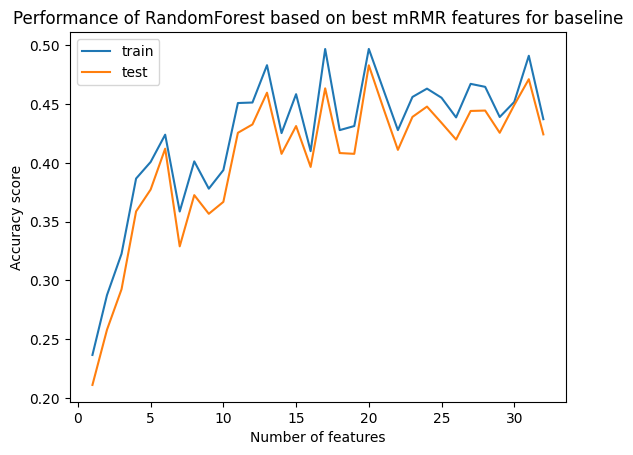

Best score of testing set for : 0.48310810810810806 with 19 features


In [113]:
k = best_features_mRMR_baseline.shape[1]

S, St, V, Vt, n_features, mRMR_classifiers = RF_all_features_score(features_array_baseline, label_array_baseline, best_features_mRMR_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, k)
m = plot_all_features(St, S, n_features, "mRMR")

List of std mRMR: 0.06430466142802763


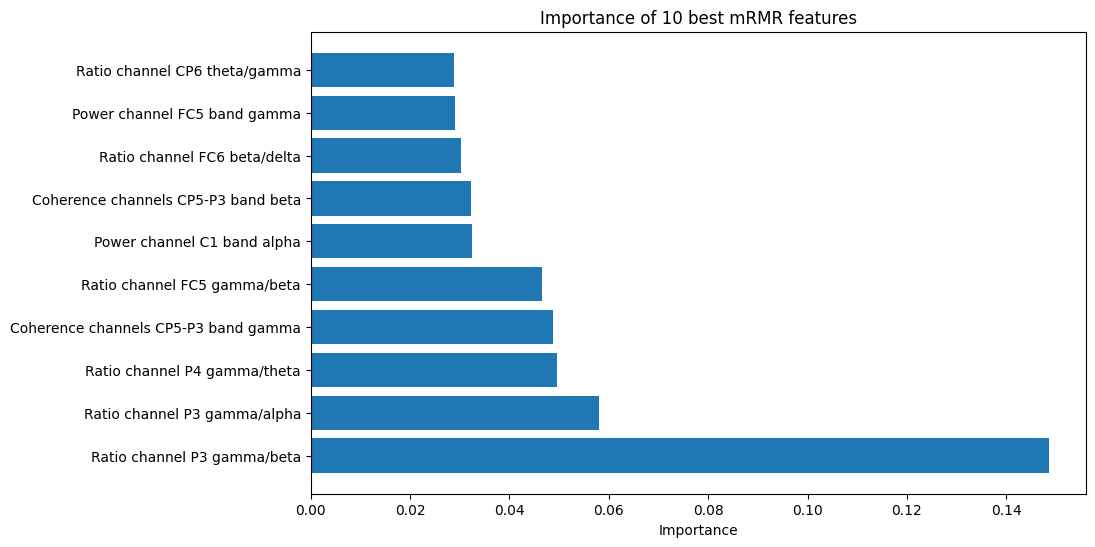

In [114]:
print(f"List of std mRMR: {V[m]}")
feature_importance(features_array_baseline, best_features_mRMR_baseline, mRMR_classifiers[m], k=10)

100%|███████████████████████████████████████████| 25/25 [00:08<00:00,  2.89it/s]


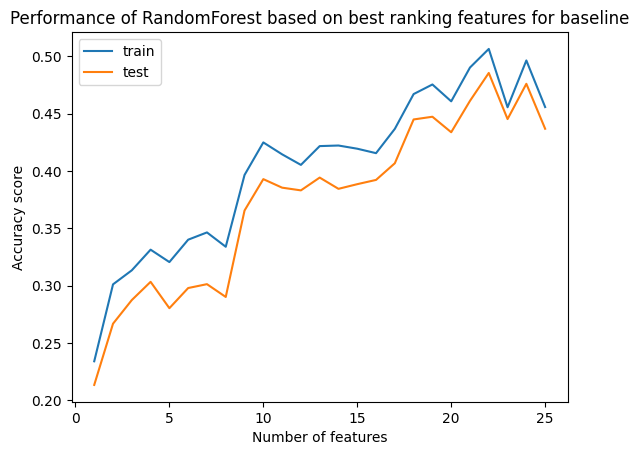

Best score of testing set for : 0.48547297297297287 with 21 features


In [115]:
k = best_features_ranking_baseline.shape[1]

St, S, V, Vt, n_features, ranking_classifiers = RF_all_features_score(features_array_baseline, label_array_baseline, best_features_ranking_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, k)
r = plot_all_features(S, St, n_features, "ranking")

List of std ranking : 0.032782458028941086


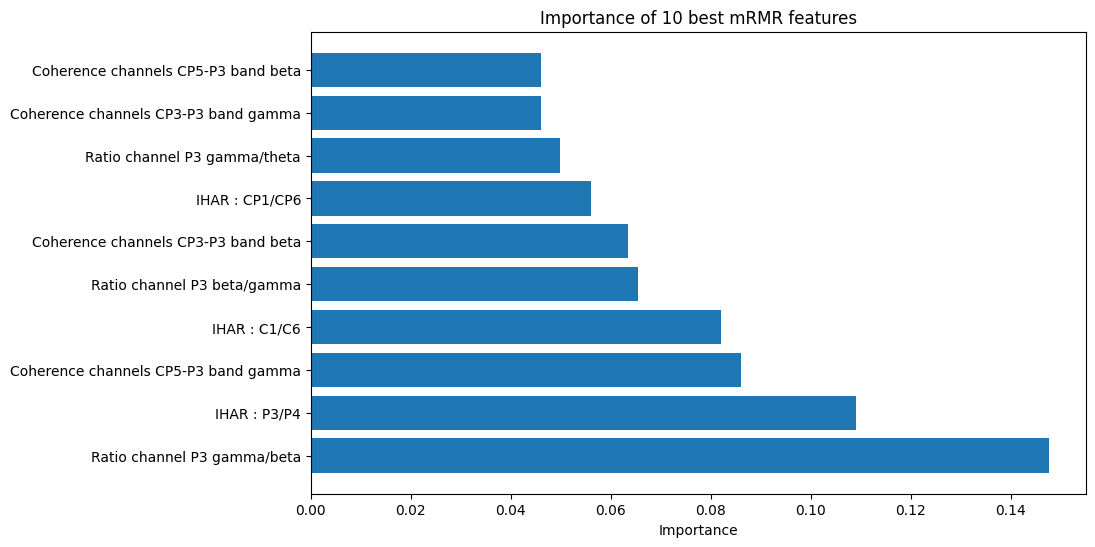

In [116]:
print(f"List of std ranking : {V[r]}")
feature_importance(features_array_baseline, best_features_ranking_baseline, ranking_classifiers[r], k=10)

100%|███████████████████████████████████████████| 44/44 [00:17<00:00,  2.49it/s]


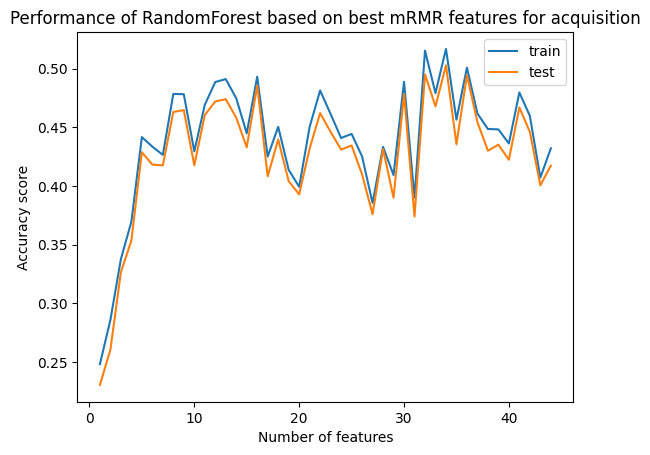

Best score of testing set for : 0.5028846153846154 with 33 features


In [117]:
k = best_features_mRMR_acquisition.shape[1]

St, S, V, Vt, n_features, mRMR_classifiers = RF_all_features_score(features_array_acquisition, label_array_acquisition, best_features_mRMR_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k)
m = plot_all_features(S, St, n_features, "mRMR", "acquisition")

List of std mRMR : 0.06263873490988714


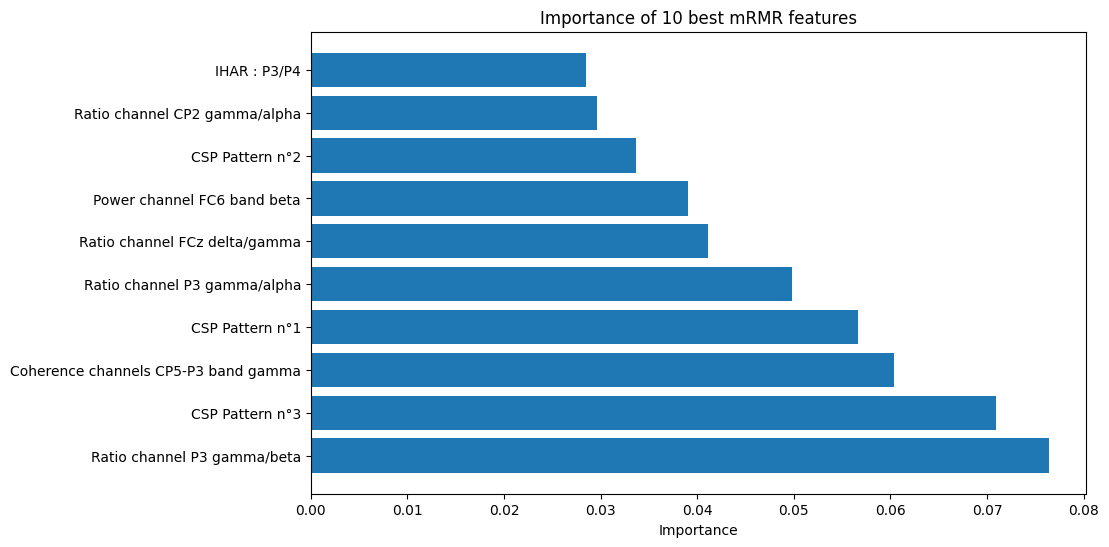

In [118]:
print(f"List of std mRMR : {V[m]}")
feature_importance(features_array_acquisition, best_features_mRMR_acquisition, mRMR_classifiers[m], k=10)

100%|███████████████████████████████████████████| 39/39 [00:14<00:00,  2.69it/s]


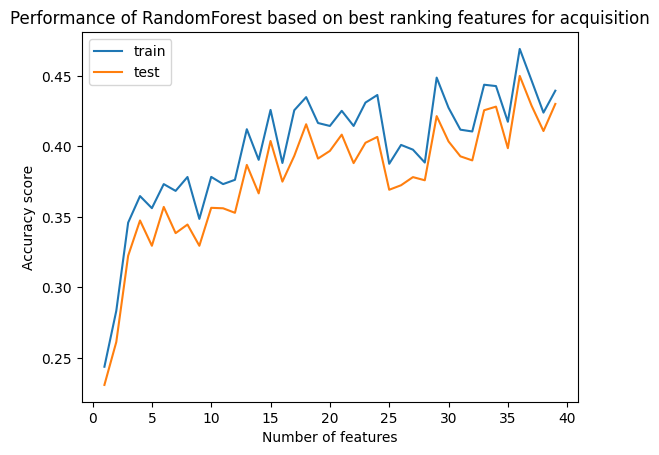

Best score of testing set for : 0.45 with 35 features


In [119]:
k = best_features_ranking_acquisition.shape[1]

St, S, V, Vt, n_features, ranking_classifiers = RF_all_features_score(features_array_acquisition, label_array_acquisition, best_features_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k)
r = plot_all_features(S, St, n_features, "ranking", "acquisition")

List of std ranking : 0.07544928980459929


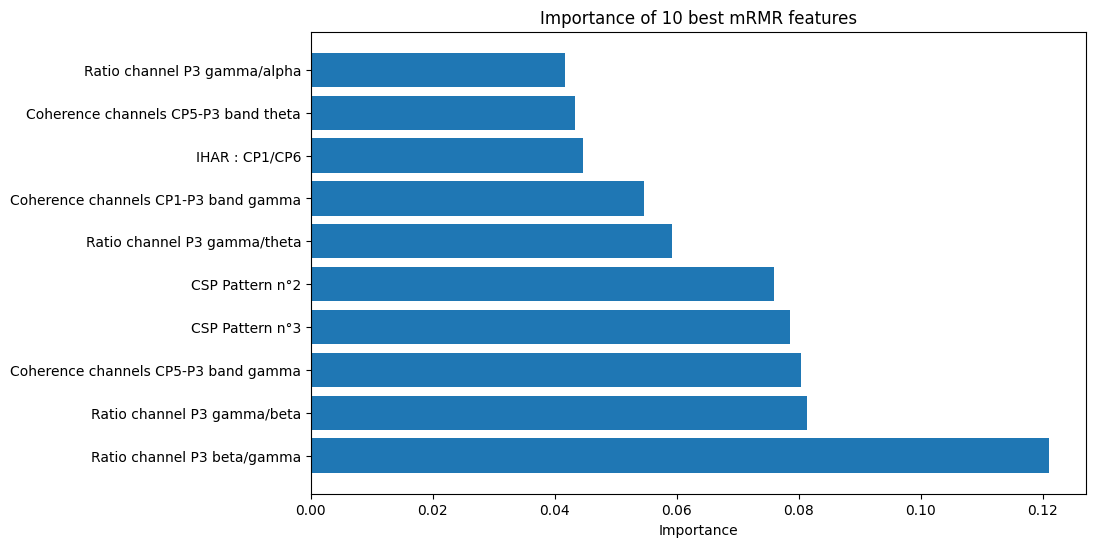

In [120]:
print(f"List of std ranking : {V[r]}")
feature_importance(features_array_acquisition, best_features_ranking_acquisition, ranking_classifiers[r], k=10)

100%|███████████████████████████████████████████| 44/44 [00:36<00:00,  1.21it/s]


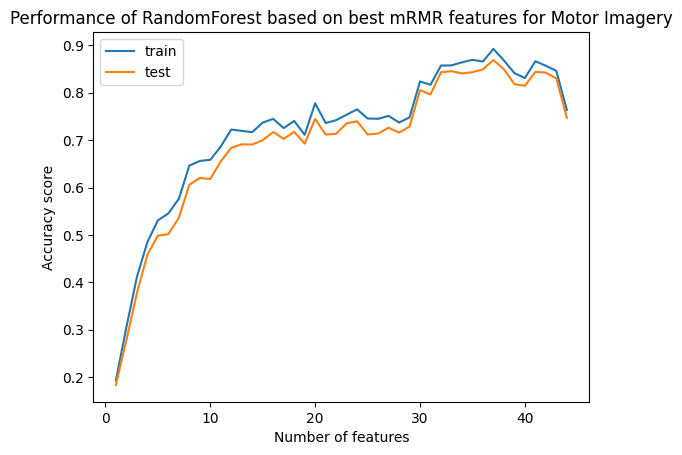

Best score of testing set for : 0.8690705128205127 with 36 features


In [121]:
k = best_features_mRMR_MI.shape[1]

St, S, V, Vt, n_features, mRMR_classifiers = RF_all_features_score(features_array_MI, label_array_MI, best_features_mRMR_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k)
m = plot_all_features(S, St, n_features, "mRMR", "Motor Imagery")

List of std mRMR : 0.03289982529244654


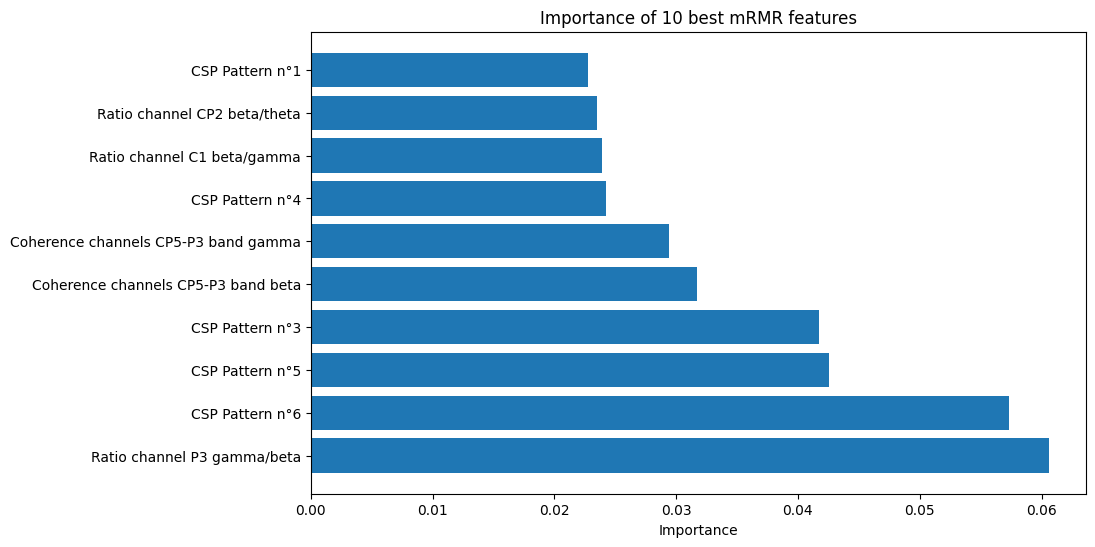

In [122]:
print(f"List of std mRMR : {V[m]}")
feature_importance(features_array_MI, best_features_mRMR_MI, mRMR_classifiers[m], k=10)

100%|███████████████████████████████████████████| 41/41 [00:33<00:00,  1.23it/s]


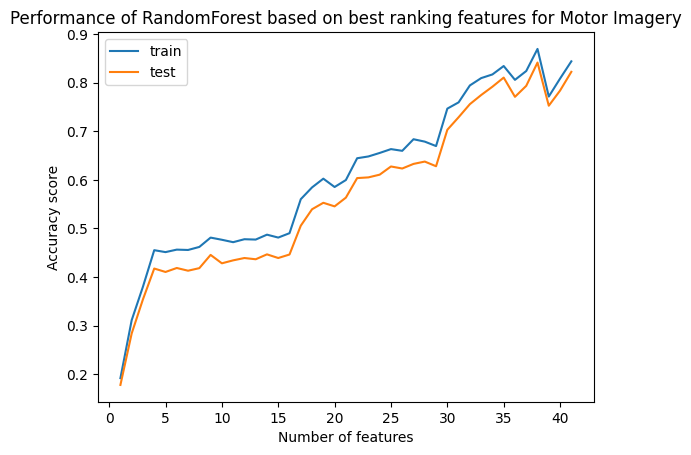

Best score of testing set for : 0.8413461538461539 with 37 features


In [123]:
k = best_features_ranking_MI.shape[1]

St, S, V, Vt, n_features, ranking_classifiers = RF_all_features_score(features_array_MI, label_array_MI, best_features_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k)
r = plot_all_features(S, St, n_features, "ranking", "Motor Imagery")

List of std ranking : 0.018460815067736155


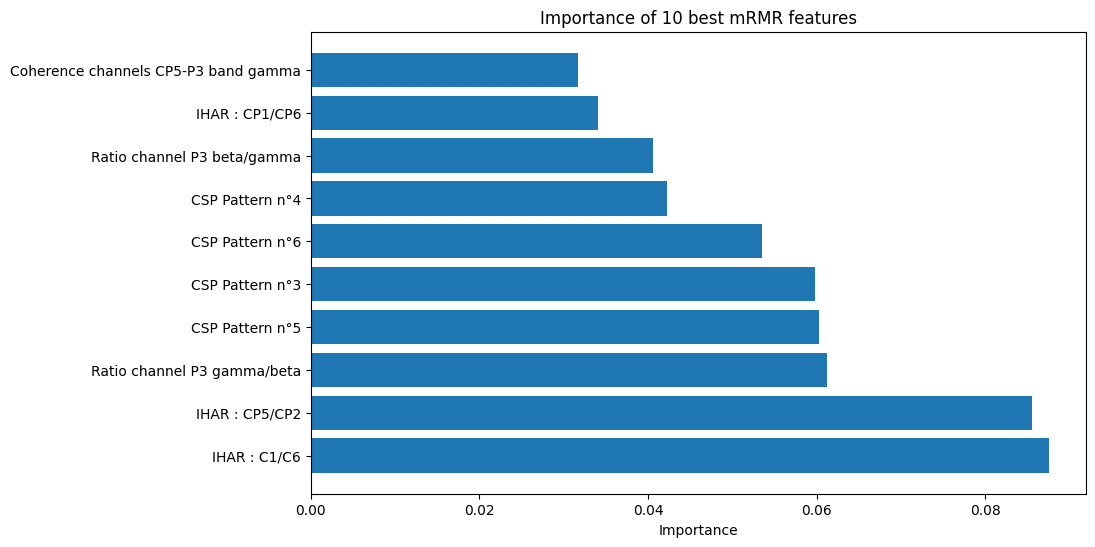

In [124]:
print(f"List of std ranking : {V[r]}")
feature_importance(features_array_MI, best_features_ranking_MI, ranking_classifiers[r], k=10)

##### Support Vector Machines

In [22]:
import warnings

In [130]:
dot = 10
C = np.linspace(1e-1, 1, dot)

# Ignorer tous les avertissements
warnings.filterwarnings("ignore")

La formule complète de cette règle est :

$$
f_{\text{max}} = \frac{N}{10 \times d}
$$

Où :

N = number of sample  
f = number of features  
d = number of parameters to estimate
-> for instance for SVM the number of parameters to estimate is equal to the number of features plus one

In [120]:
#We will try to get a convenient number of features for each file type
print(f"Sample for baseline {Sample_baseline}")
print(f"Sample for acquisition {Sample_acquisition}")
print(f"Sample for motor imagery {Sample_MI}")

def SVM_number_features(N, L):
    
    for l in L:
        print(f"{l} features, fmax = {int(N/(10*l))}")

    pass

L = [k for k in range(1, 50, 5)]

Sample for baseline 2960
Sample for acquisition 3120
Sample for motor imagery 6240


In [121]:
SVM_number_features(Sample_baseline, L)
f_baseline = 16

1 features, fmax = 296
6 features, fmax = 49
11 features, fmax = 26
16 features, fmax = 18
21 features, fmax = 14
26 features, fmax = 11
31 features, fmax = 9
36 features, fmax = 8
41 features, fmax = 7
46 features, fmax = 6


In [122]:
SVM_number_features(Sample_acquisition, L)
f_acquisition = 16

1 features, fmax = 312
6 features, fmax = 52
11 features, fmax = 28
16 features, fmax = 19
21 features, fmax = 14
26 features, fmax = 12
31 features, fmax = 10
36 features, fmax = 8
41 features, fmax = 7
46 features, fmax = 6


In [123]:
SVM_number_features(Sample_MI, L)
f_MI = 21

1 features, fmax = 624
6 features, fmax = 104
11 features, fmax = 56
16 features, fmax = 39
21 features, fmax = 29
26 features, fmax = 24
31 features, fmax = 20
36 features, fmax = 17
41 features, fmax = 15
46 features, fmax = 13


Tune C hyperparameter

In [124]:
def tune_C(x, y, features, C, dot=dot, f=f_baseline):
    
    S_train = []
    S_test  = []
    i=int(100/dot)

    #Storing the classifiers for each iteration (to retrieve the best classifiers depending on estimators)
    classifiers = []

    #Separating the array into 5 buckets to perform 5-fold cross validation (but not random folds)
    buckets, buckets_label = subject_buckets(x, y, 5)
    
    #SVM is pretty resistant to overfitting due to C parmeter -> thus we will just tune this one
    for c in C:
        
        clf = svm.SVC(kernel = "linear", C=c, tol=5e-2, max_iter=1000)

        scores_train, scores_test, clfs = KFolding(buckets, buckets_label, clf, k=f, all_features=features, bins=5)
        classifiers.append(clfs)

        S_train.append(np.mean(scores_train))
        S_test.append(np.mean(scores_test))

        print(f"Progress : {i}%")
        i+=int(100/dot)
        
    return S_train, S_test, classifiers

In [125]:
def plot_C(C, S_train, S_test, filenames):
        
    fig, ax = plt.subplots()
    ax.set_xlabel("Value of C")
    ax.set_ylabel("accuracy")
    ax.set_title(f"Performance of SVM based on C parameter for training and testing sets with {filenames} files")
    ax.plot(C, S_train, marker="o", label="train", linestyle="-")
    ax.plot(C, S_test, marker="o", label="test", linestyle="-")
    ax.legend()
    plt.show()

    c_opti = C[np.argmax(S_test)]
    print(f"The best score is {max(S_test)} for C = {c_opti}")

    return c_opti

Redifining the feature_importance function since we changed classifier

In [126]:
def feature_importance(x, features, classifiers, k=10, all_folds=True, bins=5, method='mRMR'):

    #Getting the number of features in the classifier
    f = classifiers[0].n_features_in_

    #Getting all the features taken into account by all the folds (number >= f)
    features_flatten = unique_features(features, k=f)
    
    D_idx = {}
    for i in range(len(features_flatten)):
        D_idx[features_flatten[i]] = i

    n = len(features_flatten)

    if all_folds :

        importances = np.zeros((n,))
        
        for i in range(bins):

            clf = classifiers[i]

            #Getting the features analyzed on this fold
            index = features[i][:f]
            index = [D_idx[key] for key in index]
        
            
            #This gives the mean weight of each feature (i.e its importance)
            importances[index] += np.abs(np.mean(clf.coef_, axis=0))

    
        #Calculating the mean of the importances array (divided by bins because we have bins folds)
        importances = importances / bins
        importances = importances.tolist()

        col_name = x.columns[features_flatten]
        
        #Storing features and their importance score in the dataframe (rows index = feature names, values = their score)
        df = pd.DataFrame({'col_name': importances}, index=col_name).sort_values(by='col_name', ascending=False)

        #Names of the k best features
        best_features = df.index.tolist()[:k]
        
        #Names of the columns of the k best features
        scores = df['col_name'].tolist()[:k]
        
        #Visualisation
        plt.figure(figsize=(k, 6))
        plt.barh(range(k), scores, align='center')
        plt.yticks(range(k), best_features)
        plt.xlabel('Importance')
        plt.title(f'Importance of {k} best {method} features')
        plt.show()

    if not all_folds:
        
        for i in range(5):
        
            clf = classifiers[i]

            #Figuring out every feature importance and transforming it into a list (usefull later)
            importances = clf.feature_importances_
            importances = importances.tolist()
        
            #Storing features and their importance score in the dataframe (rows index = feature names, values = their score)
            df = pd.DataFrame({'col_name': importances}, index=features).sort_values(by='col_name', ascending=False)
    
            #Names of the k best features
            features = df.index.tolist()[:k]
            
            #Names of the columns of the k best features
            scores = df['col_name'].tolist()[:k]
            
            #Visualisation
            plt.figure(figsize=(k, 6))
            plt.barh(range(k), scores, align='center')
            plt.yticks(range(k), features)
            plt.xlabel('Importance')
            plt.title(f'Importance of {k} best features')
            plt.show()
            
    return None

Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


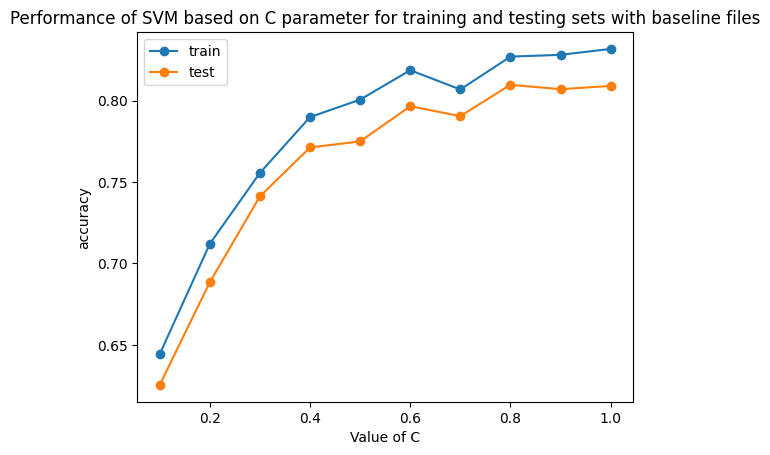

The best score is 0.8097972972972973 for C = 0.8


In [131]:
#For baseline files
S_train, S_test, classifiers = tune_C(features_array_baseline, label_array_baseline, features_mRMR_baseline, C)
c_opti_baseline = plot_C(C, S_train, S_test, "baseline")

Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


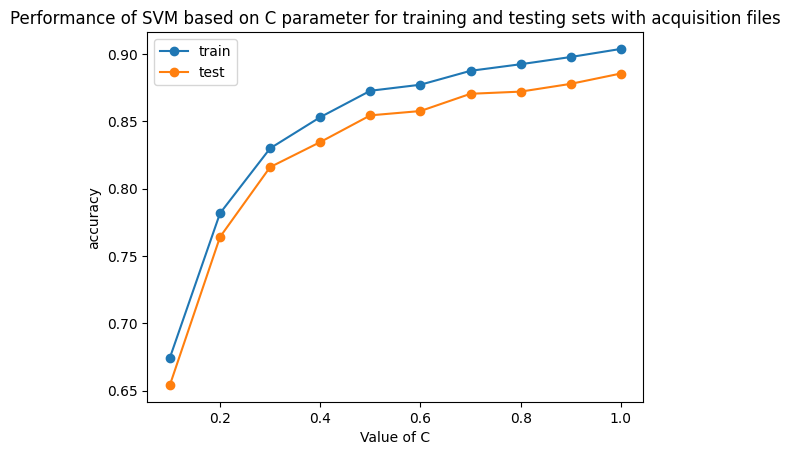

The best score is 0.885576923076923 for C = 1.0


In [132]:
#For acquisition files
S_train, S_test, classifiers = tune_C(features_array_acquisition, label_array_acquisition, features_mRMR_acquisition, C, f=f_acquisition)
c_opti_acquisition = plot_C(C, S_train, S_test, "acquisition")

Progress : 10%
Progress : 20%
Progress : 30%
Progress : 40%
Progress : 50%
Progress : 60%
Progress : 70%
Progress : 80%
Progress : 90%
Progress : 100%


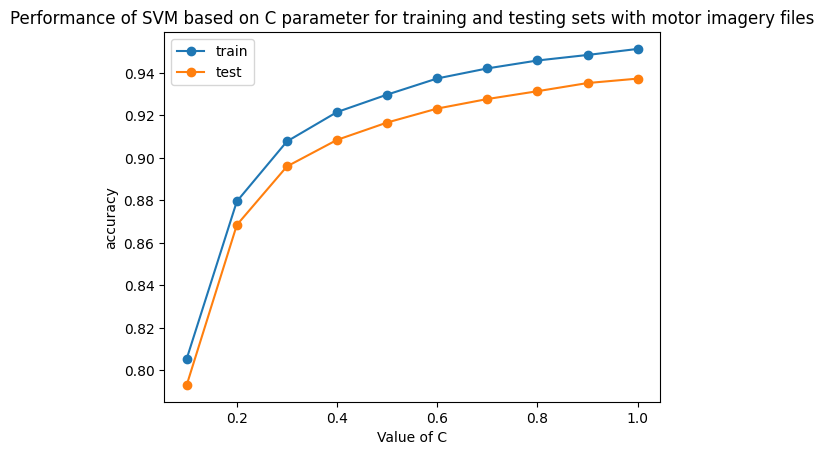

The best score is 0.9373397435897436 for C = 1.0


In [133]:
#For motor imagery files
S_train, S_test, classifiers = tune_C(features_array_MI, label_array_MI, features_mRMR_MI, C, f=f_MI)
c_opti_MI = plot_C(C, S_train, S_test, "motor imagery")

In [134]:
def SVM_features_score(x, y, mRMR_features, ranking_features, c_opti=c_opti_MI, k=1, step=1):

    #S for scores, V for variance (std)
    Sm, Sr, Vm, Vr = [], [], [], []

    n_features = []

    mRMR_classifiers = []
    ranking_classifiers = []

    #We're using the best Classifier found
    clf = svm.SVC(kernel = "linear", C=c_opti, tol=5e-2, max_iter=1000)

    #Separating the data into 5 buckets
    buckets, buckets_label = subject_buckets(x, y, bins=5)
    
    #Doing the classification task on the most relevant PSD features
    for n in tqdm(range(1, k+1, step)):
        
        train_mRMR, test_mRMR, mRMR_clfs = KFolding(buckets, buckets_label, clf, all_features=mRMR_features, k=n, bins=5)
        train_ranking, test_ranking, ranking_clfs = KFolding(buckets, buckets_label, clf, all_features=ranking_features, k=n, bins=5)
                
        mRMR_classifiers.append(mRMR_clfs)
        ranking_classifiers.append(ranking_clfs)

        Sm.append(np.mean(test_mRMR))
        Vm.append(np.std(test_mRMR))

        Sr.append(np.mean(test_ranking))
        Vr.append(np.std(test_ranking))

        n_features.append(n)

    return Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers

PSD Features

In [135]:
print(f"Max features : {f_baseline}")

Max features : 16


100%|███████████████████████████████████████████| 16/16 [00:59<00:00,  3.72s/it]


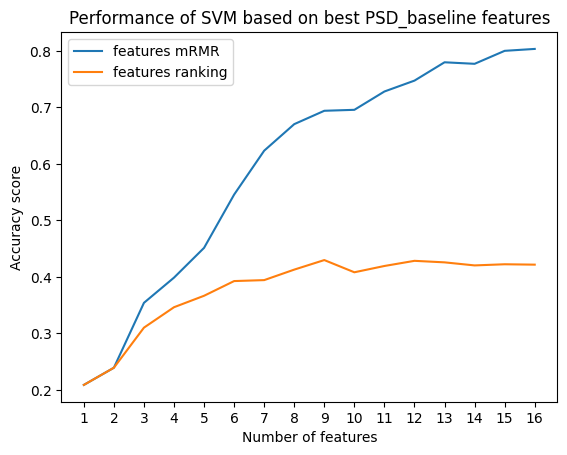

Best score for mRMR : 0.8033783783783782 with 16 features
Best score for ranking : 0.4297297297297297 with 9 features


In [136]:
#For baseline files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_PSD_baseline, label_array_baseline, PSD_mRMR_baseline, PSD_ranking_baseline, c_opti_baseline, k=f_baseline, step=1)
SVM_PSD_mRMR_baseline, SVM_PSD_ranking_baseline = plot_accu(Sm, Sr, n_features, feature_type="PSD_baseline", name="SVM")

In [137]:
print('Features values', SVM_PSD_mRMR_baseline, SVM_PSD_ranking_baseline)

m, r = n_features.index(SVM_PSD_mRMR_baseline), n_features.index(SVM_PSD_ranking_baseline)
print('Index values', m, r)

Features values 16 9
Index values 15 8


In [138]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

List of std mRMR: 0.04421160271312398
List of std ranking: 0.03043542062041947


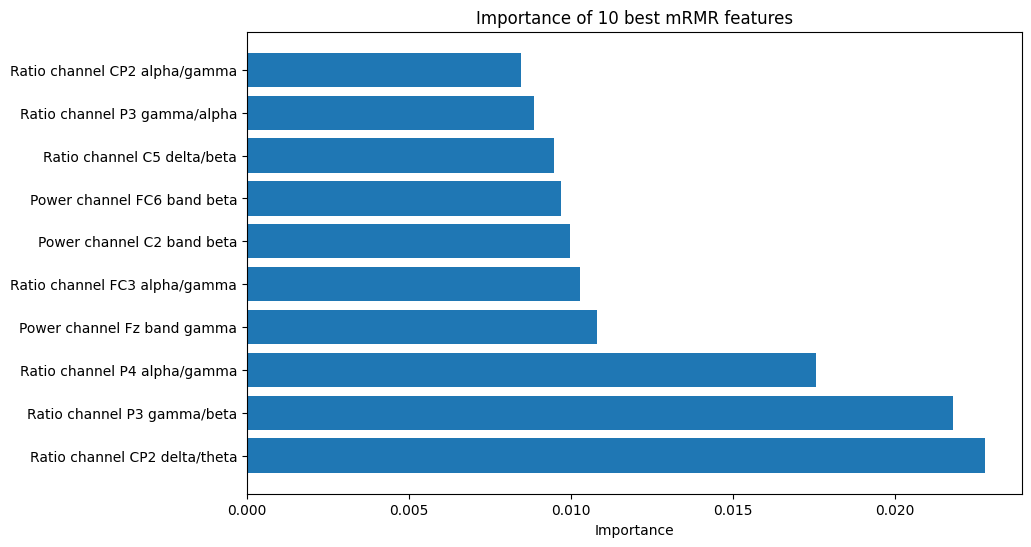

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (9,) and arg 3 with shape (10,).

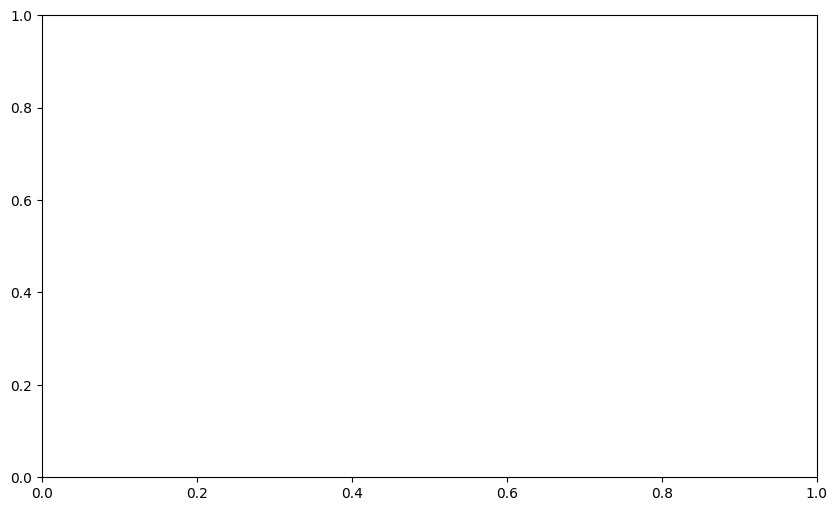

In [139]:
feature_importance(X_PSD_baseline, PSD_mRMR_baseline, mRMR_classifiers[m])
feature_importance(X_PSD_baseline, PSD_ranking_baseline, ranking_classifiers[r], method='ranking')

In [ ]:
print(f"Max features : {f_acquisition}")

In [ ]:
# For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_PSD_acquisition, label_array_acquisition, PSD_mRMR_acquisition, PSD_ranking_acquisition, c_opti_acquisition, f_acquisition, step=1)
SVM_PSD_mRMR_acquisition, SVM_PSD_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="PSD_acquisition")

In [117]:
print('Features values', RF_PSD_mRMR_acquisition, RF_PSD_ranking_acquisition)

m, r = n_features.index(RF_PSD_mRMR_acquisition), n_features.index(RF_PSD_ranking_acquisition)
print('Index values', m, r)

NameError: name 'RF_PSD_mRMR_acquisition' is not defined

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_PSD_acquisition, PSD_mRMR_acquisition, mRMR_classifiers[m])
feature_importance(X_PSD_acquisition, PSD_ranking_acquisition, ranking_classifiers[r], method='ranking')

In [ ]:
print(f"Max features : {f_MI}")

In [ ]:
# For motor imagery files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_PSD_MI, label_array_MI, PSD_mRMR_MI, PSD_ranking_MI, c_opti_MI, f_MI)
SVM_PSD_mRMR_MI, SVM_PSD_ranking_MI = plot_accu(Sm, Sr, n_features, feature_type="PSD_MI")

In [ ]:
print('Features values', RF_PSD_mRMR_MI, RF_PSD_ranking_MI)

m, r = n_features.index(RF_PSD_mRMR_MI), n_features.index(RF_PSD_ranking_MI)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_PSD_MI, PSD_mRMR_MI, mRMR_classifiers[m])
feature_importance(X_PSD_MI, PSD_ranking_MI, ranking_classifiers[r], method='ranking')

Coherence Features

In [ ]:
#Grid
k = len(X_COH_baseline.columns.tolist())

100%|███████████████████████████████████████████| 16/16 [01:15<00:00,  4.74s/it]


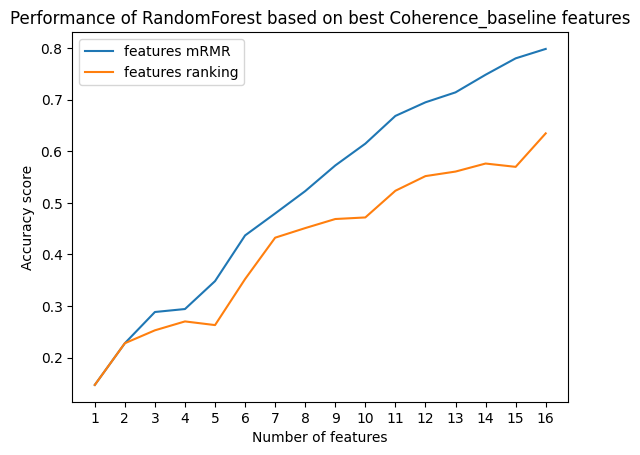

Best score for mRMR : 0.7979729729729731 with 16 features
Best score for ranking : 0.6344594594594595 with 16 features


In [118]:
# For baseline files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_COH_baseline, label_array_baseline, COH_mRMR_baseline, COH_ranking_baseline, c_opti_baseline, f_baseline) 
SVM_COH_mRMR_baseline, SVM_COH_ranking_baseline = plot_accu(Sm, Sr, n_features, feature_type="Coherence_baseline")


In [ ]:
print('Features values', RF_COH_mRMR_baseline, RF_COH_ranking_baseline)

m, r = n_features.index(RF_COH_mRMR_baseline), n_features.index(RF_COH_ranking_baseline)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_COH_baseline, COH_mRMR_baseline, mRMR_classifiers[m])
feature_importance(X_COH_baseline, COH_ranking_baseline, ranking_classifiers[r], method='ranking', k=r)

In [ ]:
# For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_COH_acquisition, label_array_acquisition, COH_mRMR_acquisition, COH_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, f_max_acquisition) 
SVM_COH_mRMR_acquisition, SVM_COH_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="Coherence_acquisition")


In [ ]:
print('Features values', RF_COH_mRMR_acquisition, RF_COH_ranking_acquisition)

m, r = n_features.index(RF_COH_mRMR_acquisition), n_features.index(RF_COH_ranking_acquisition)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_COH_acquisition, COH_mRMR_acquisition, mRMR_classifiers[m])
feature_importance(X_COH_acquisition, COH_ranking_acquisition, ranking_classifiers[r], method='ranking')

In [ ]:
# For motor imagery files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_COH_MI, label_array_MI, COH_mRMR_MI, COH_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, f_max_MI) 
SVM_COH_mRMR_MI, SVM_COH_ranking_MI = plot_accu(Sm, Sr, n_features, feature_type="Coherence_MI")


In [ ]:
print('Features values', RF_COH_mRMR_MI, RF_COH_ranking_MI)

m, r = n_features.index(RF_COH_mRMR_MI), n_features.index(RF_COH_ranking_MI)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_COH_MI, COH_mRMR_MI, mRMR_classifiers[m])
feature_importance(X_COH_MI, COH_ranking_MI, ranking_classifiers[r], method='ranking')

CSP Features

In [ ]:
# For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_CSP_acquisition, label_array_acquisition, CSP_mRMR_acquisition, CSP_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k=6)
SVM_CSP_mRMR_acquisition, SVM_CSP_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="CSP_acquisition")


In [ ]:
print('Features values', RF_CSP_mRMR_acquisition, RF_CSP_ranking_acquisition)

m, r = n_features.index(RF_CSP_mRMR_acquisition), n_features.index(RF_CSP_ranking_acquisition)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_CSP_acquisition, CSP_mRMR_acquisition, mRMR_classifiers[m], k=m+1)
feature_importance(X_CSP_acquisition, CSP_ranking_acquisition, ranking_classifiers[r], k=r+1)

In [ ]:
# For MI files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_CSP_MI, label_array_MI, CSP_mRMR_MI, CSP_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k=6)
SVM_CSP_mRMR_MI, SVM_CSP_ranking_MI = plot_accu(Sm, Sr, n_features, feature_type="CSP_MI")


In [ ]:
print('Features values', RF_CSP_mRMR_MI, RF_CSP_ranking_MI)

m, r = n_features.index(RF_CSP_mRMR_MI), n_features.index(RF_CSP_ranking_MI)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_CSP_MI, CSP_mRMR_MI, mRMR_classifiers[m], k=m+1)
feature_importance(X_CSP_MI, CSP_ranking_MI, ranking_classifiers[r], k=r+1)

IHAR Features

In [ ]:
# For baseline files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_IHAR_baseline, label_array_baseline, IHAR_mRMR_baseline, IHAR_ranking_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, k=11) 
SVM_IHAR_mRMR_baseline, SVM_IHAR_ranking_baseline = plot_accu(Sm, Sr, n_features, feature_type="IHAR_baseline")


In [ ]:
print('Features values', RF_IHAR_mRMR_baseline, RF_IHAR_ranking_baseline)

m, r = n_features.index(RF_IHAR_mRMR_baseline), n_features.index(RF_IHAR_ranking_baseline)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_IHAR_baseline, IHAR_mRMR_baseline, mRMR_classifiers[m], k=m+1)
feature_importance(X_IHAR_baseline, IHAR_ranking_baseline, ranking_classifiers[r], k=r+1)

In [ ]:
# For acquisition files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_IHAR_acquisition, label_array_acquisition, IHAR_mRMR_acquisition, IHAR_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k=11) 
SVM_IHAR_mRMR_acquisition, SVM_IHAR_ranking_acquisition = plot_accu(Sm, Sr, n_features, feature_type="IHAR_acquisition")

In [ ]:
print('Features values', RF_IHAR_mRMR_acquisition, RF_IHAR_ranking_acquisition)

m, r = n_features.index(RF_IHAR_mRMR_acquisition), n_features.index(RF_IHAR_ranking_acquisition)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_IHAR_acquisition, IHAR_mRMR_acquisition, mRMR_classifiers[m], k=m+1)
feature_importance(X_IHAR_acquisition, IHAR_ranking_acquisition, ranking_classifiers[r], k=r+1)

In [ ]:
# For Motor imagery files
Sm, Sr, Vm, Vr, n_features, mRMR_classifiers, ranking_classifiers = SVM_features_score(X_IHAR_MI, label_array_MI, IHAR_mRMR_MI, IHAR_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k=11, step=1) 
SVM_IHAR_mRMR_MI, SVM_IHAR_ranking_MI = plot_accu(Sm, Sr, n_features, feature_type="IHAR_MI")

In [ ]:
print('Features values', RF_IHAR_mRMR_MI, RF_IHAR_ranking_MI)

m, r = n_features.index(RF_IHAR_mRMR_MI), n_features.index(RF_IHAR_ranking_MI)
print('Index values', m, r)

In [ ]:
print(f"List of std mRMR: {Vm[m]}")
print(f"List of std ranking: {Vr[r]}")

In [ ]:
feature_importance(X_IHAR_MI, IHAR_mRMR_MI, mRMR_classifiers[m], k=m+1)
feature_importance(X_IHAR_MI, IHAR_ranking_MI, ranking_classifiers[r], k=r+1)

Concatenate best features (with Support Vector Machine) into arrays

In [ ]:
#Function to retrieve the global index corresponding to every local index
def adjust_index(df, DF, features_mRMR, features_ranking):
    #df = the dataframe containing the feature_type
    #DF = the full dataframe
    #features shape = (5, #features)

    features_mRMR_corrected = features_mRMR.copy().astype(object)
    features_ranking_corrected = features_ranking.copy().astype(object)

    #Retrieving features_name
    for i in range(5):
        features_mRMR_corrected[i] = df.columns[features_mRMR[i]]
        features_ranking_corrected[i] = df.columns[features_ranking[i]]

    
    #Dictionnary to retrieve the correct index in the full dataframe
    D = {}
    i=0
    for name in DF.columns:

        D[name] = i
        i+=1

    for i in range(5):
        for j in range(len(features_mRMR[0])):
            features_mRMR_corrected[i, j] = D[features_mRMR_corrected[i, j]]

        for j in range(len(features_ranking[0])):
            features_ranking_corrected[i, j] = D[features_ranking_corrected[i, j]]
                                          
    
    return features_mRMR_corrected.astype(int), features_ranking_corrected.astype(int)

In [ ]:
# PSD
best_PSD_mRMR_baseline = PSD_mRMR_baseline[:, :SVM_PSD_mRMR_baseline]
best_PSD_ranking_baseline = PSD_ranking_baseline[:, :SVM_PSD_ranking_baseline]
best_PSD_mRMR_baseline, best_PSD_ranking_baseline = adjust_index(X_PSD_baseline, features_array_baseline, best_PSD_mRMR_baseline, best_PSD_ranking_baseline)

# COH
best_COH_mRMR_baseline = COH_mRMR_baseline[:, :SVM_COH_mRMR_baseline]
best_COH_ranking_baseline = COH_ranking_baseline[:, :SVM_COH_ranking_baseline]
best_COH_mRMR_baseline, best_COH_ranking_baseline = adjust_index(X_COH_baseline, features_array_baseline, best_COH_mRMR_baseline, best_COH_ranking_baseline)

# IHAR
best_IHAR_mRMR_baseline = IHAR_mRMR_baseline[:, :SVM_IHAR_mRMR_baseline]
best_IHAR_ranking_baseline = IHAR_ranking_baseline[:, :SVM_IHAR_ranking_baseline]
best_IHAR_mRMR_baseline, best_IHAR_ranking_baseline = adjust_index(X_IHAR_baseline, features_array_baseline, best_IHAR_mRMR_baseline, best_IHAR_ranking_baseline)

# The full array
best_features_mRMR_baseline = np.concatenate((best_PSD_mRMR_baseline, best_COH_mRMR_baseline, best_IHAR_mRMR_baseline), axis=1)
best_features_ranking_baseline = np.concatenate((best_PSD_ranking_baseline, best_COH_ranking_baseline, best_IHAR_ranking_baseline), axis=1)
print(f"Best features mRMR folds shape : {best_features_mRMR_baseline.shape}\nBest features ranking folds shape : {best_features_ranking_baseline.shape}")


In [ ]:
# PSD
best_PSD_mRMR_acquisition = PSD_mRMR_acquisition[:, :SVM_PSD_mRMR_acquisition]
best_PSD_ranking_acquisition = PSD_ranking_acquisition[:, :SVM_PSD_ranking_acquisition]
best_PSD_mRMR_acquisition, best_PSD_ranking_acquisition = adjust_index(X_PSD_acquisition, features_array_acquisition, best_PSD_mRMR_acquisition, best_PSD_ranking_acquisition)

# COH
best_COH_mRMR_acquisition = COH_mRMR_acquisition[:, :SVM_COH_mRMR_acquisition]
best_COH_ranking_acquisition = COH_ranking_acquisition[:, :SVM_COH_ranking_acquisition]
best_COH_mRMR_acquisition, best_COH_ranking_acquisition = adjust_index(X_COH_acquisition, features_array_acquisition, best_COH_mRMR_acquisition, best_COH_ranking_acquisition)

# CSP
best_CSP_mRMR_acquisition = CSP_mRMR_acquisition[:, :SVM_CSP_mRMR_acquisition]
best_CSP_ranking_acquisition = CSP_ranking_acquisition[:, :SVM_CSP_ranking_acquisition]
best_CSP_mRMR_acquisition, best_CSP_ranking_acquisition = adjust_index(X_CSP_acquisition, features_array_acquisition, best_CSP_mRMR_acquisition, best_CSP_ranking_acquisition)

# IHAR
best_IHAR_mRMR_acquisition = IHAR_mRMR_acquisition[:, :SVM_IHAR_mRMR_acquisition]
best_IHAR_ranking_acquisition = IHAR_ranking_acquisition[:, :SVM_IHAR_ranking_acquisition]
best_IHAR_mRMR_acquisition, best_IHAR_ranking_acquisition = adjust_index(X_IHAR_acquisition, features_array_acquisition, best_IHAR_mRMR_acquisition, best_IHAR_ranking_acquisition)

# The full array
best_features_mRMR_acquisition = np.concatenate((best_PSD_mRMR_acquisition, best_COH_mRMR_acquisition, best_CSP_mRMR_acquisition, best_IHAR_mRMR_acquisition), axis=1)
best_features_ranking_acquisition = np.concatenate((best_PSD_ranking_acquisition, best_COH_ranking_acquisition, best_CSP_ranking_acquisition, best_IHAR_ranking_acquisition), axis=1)
print(f"Best features mRMR acquisition shape : {best_features_mRMR_acquisition.shape}\nBest features ranking acquisition shape : {best_features_ranking_acquisition.shape}")


In [ ]:
# PSD
best_PSD_mRMR_MI = PSD_mRMR_MI[:, :SVM_PSD_mRMR_MI]
best_PSD_ranking_MI = PSD_ranking_MI[:, :SVM_PSD_ranking_MI]
best_PSD_mRMR_MI, best_PSD_ranking_MI = adjust_index(X_PSD_MI, features_array_MI, best_PSD_mRMR_MI, best_PSD_ranking_MI)

# COH
best_COH_mRMR_MI = COH_mRMR_MI[:, :SVM_COH_mRMR_MI]
best_COH_ranking_MI = COH_ranking_MI[:, :SVM_COH_ranking_MI]
best_COH_mRMR_MI, best_COH_ranking_MI = adjust_index(X_COH_MI, features_array_MI, best_COH_mRMR_MI, best_COH_ranking_MI)

# CSP
best_CSP_mRMR_MI = CSP_mRMR_MI[:, :SVM_CSP_mRMR_MI]
best_CSP_ranking_MI = CSP_ranking_MI[:, :SVM_CSP_ranking_MI]
best_CSP_mRMR_MI, best_CSP_ranking_MI = adjust_index(X_CSP_MI, features_array_MI, best_CSP_mRMR_MI, best_CSP_ranking_MI)

# IHAR
best_IHAR_mRMR_MI = IHAR_mRMR_MI[:, :SVM_IHAR_mRMR_MI]
best_IHAR_ranking_MI = IHAR_ranking_MI[:, :SVM_IHAR_ranking_MI]
best_IHAR_mRMR_MI, best_IHAR_ranking_MI = adjust_index(X_IHAR_MI, features_array_MI, best_IHAR_mRMR_MI, best_IHAR_ranking_MI)

# The full array
best_features_mRMR_MI = np.concatenate((best_PSD_mRMR_MI, best_COH_mRMR_MI, best_CSP_mRMR_MI, best_IHAR_mRMR_MI), axis=1)
best_features_ranking_MI = np.concatenate((best_PSD_ranking_MI, best_COH_ranking_MI, best_CSP_ranking_MI, best_IHAR_ranking_MI), axis=1)
print(f"Best features mRMR MI shape : {best_features_mRMR_MI.shape}\nBest features ranking MI shape : {best_features_ranking_MI.shape}")


In [ ]:
def SVM_all_features_score(x, y, features, c_opti=c_opti, k=1, step=1):
    
    #S for scores, V for variance (std)
    S, V, St, Vt = [], [], [], []

    n_features = []

    classifiers = []

    #We're using the best Classifier found
    clf = svm.SVC(kernel = "linear", C=c_opti, tol=1e-1)

    #Separating the data into 5 buckets
    buckets, buckets_label = subject_buckets(x, y, bins=5)

    #Doing the classification task on the most relevant PSD features
    for n in tqdm(range(1, k+1, step)):

        train, test, clfs = KFolding(buckets, buckets_label, clf, all_features=features, k=n, bins=5)

        classifiers.append(clfs)

        S.append(np.mean(test))
        St.append(np.mean(train))
        
        V.append(np.std(test))
        Vt.append(np.std(train))

        n_features.append(n)

    return S, St, V, Vt, n_features, classifiers

Features are ranked from the best to the worst

In [ ]:
k = best_features_mRMR_baseline.shape[1]

S, St, V, Vt, n_features, mRMR_classifiers = SVM_all_features_score(features_array_baseline, label_array_baseline, best_features_mRMR_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, k=k)
m = plot_all_features(St, S, n_features, "mRMR")

In [ ]:
print(f"List of std mRMR: {V[m]}")
feature_importance(features_array_baseline, best_features_mRMR_baseline, mRMR_classifiers[m], k=10)

In [ ]:
k = best_features_ranking_baseline.shape[1]

St, S, V, Vt, n_features, ranking_classifiers = SVM_all_features_score(features_array_baseline, label_array_baseline, best_features_ranking_baseline, estimators_opti_baseline, alpha_opti_baseline, depth_opti_baseline, k=k)
r = plot_all_features(S, St, n_features, "ranking")


In [ ]:
print(f"List of std ranking : {V[r]}")
feature_importance(features_array_baseline, best_features_ranking_baseline, ranking_classifiers[r], k=10)

In [ ]:
k = best_features_mRMR_acquisition.shape[1]

St, S, V, Vt, n_features, mRMR_classifiers = SVM_all_features_score(features_array_acquisition, label_array_acquisition, best_features_mRMR_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k=k)
m = plot_all_features(S, St, n_features, "mRMR", "acquisition")


In [ ]:
print(f"List of std mRMR : {V[m]}")
feature_importance(features_array_acquisition, best_features_mRMR_acquisition, mRMR_classifiers[m], k=10)

In [ ]:
k = best_features_ranking_acquisition.shape[1]

St, S, V, Vt, n_features, ranking_classifiers = SVM_all_features_score(features_array_acquisition, label_array_acquisition, best_features_ranking_acquisition, estimators_opti_acquisition, alpha_opti_acquisition, depth_opti_acquisition, k=k)
r = plot_all_features(S, St, n_features, "ranking", "acquisition")


In [ ]:
print(f"List of std ranking : {V[r]}")
feature_importance(features_array_acquisition, best_features_ranking_acquisition, ranking_classifiers[r], k=10)

In [ ]:
k = best_features_mRMR_MI.shape[1]

St, S, V, Vt, n_features, mRMR_classifiers = SVM_all_features_score(features_array_MI, label_array_MI, best_features_mRMR_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k=k)
m = plot_all_features(S, St, n_features, "mRMR", "Motor Imagery")


In [ ]:
print(f"List of std mRMR : {V[m]}")
feature_importance(features_array_MI, best_features_mRMR_MI, mRMR_classifiers[m], k=10)

In [ ]:
k = best_features_ranking_MI.shape[1]

St, S, V, Vt, n_features, ranking_classifiers = RF_all_features_score(features_array_MI, label_array_MI, best_features_ranking_MI, estimators_opti_MI, alpha_opti_MI, depth_opti_MI, k)
r = plot_all_features(S, St, n_features, "ranking", "Motor Imagery")

In [ ]:
print(f"List of std ranking : {V[r]}")
feature_importance(features_array_MI, best_features_ranking_MI, ranking_classifiers[r], k=10)

In [ ]:
print(f"Features array shape : {best_features.shape} \t Label array shape : {label_array.shape}")
print(f"Features array shape : {best_features_acquisition.shape} \t Label array shape : {label_array_acquisition.shape}")
print(f"Features array shape : {best_features_MI.shape} \t Label array shape : {label_array_MI.shape}")

##### Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
n = len(np.unique(label_array))

#Create a Model Class that inherits nn.Module
class Model(nn.Module): 
    # Input  layer   : # of feature neurons
    # Hidden Layer 1 : Input/2 neurons
    # Hidden Layer 2 : Hidden1/2 neurons
    # Output         : n neurons for the person identity

    def __init__(self, in_features=48-11+10, h1=24, h2=12, out_features=n):
        super().__init__() #instance of nn.Module (parent of our class)
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

# Set Criterion of model to measure the error : How far off the predictions are from the data (loss function)
criterion = nn.CrossEntropyLoss()

# Training the model
epochs = 150 # 1 epoch = 1 run throught all the training data into the network)
batch_size = 32

In [ ]:
def Neural_score(x, y, epochs=epochs, criterion=criterion, batch_size=batch_size, method="ranking", filenames="all files"):
    #List to store all losses
    all_losses = []
    all_avg_losses = []

    #Separating data to perform the 5-fold cv
    buckets, buckets_label = subject_buckets(x, y, 5)

    #Set a seed
    torch.manual_seed(41)

    #Run on every fold
    for i in range(5):

        #Initilizing/reinitializing the model
        model = Model()

        # Choosing Adam optimizer, lr = learning rate (overfitting trade off)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

        #Dividing train data and test data 5 times and transforming them into tensors
        index = [k for k in range(5) if k!=i]

        X_train = torch.FloatTensor(np.concatenate(buckets[index]))
        y_train = torch.LongTensor(np.concatenate(buckets_label[index]))

        X_test = torch.FloatTensor(buckets[i])
        y_test = torch.LongTensor(buckets_label[i])

        # Entraîner le modèle pour ce pli
        model.train()

        losses = []
        for epoch in range(1, epochs+1):
            # Forward pass
            y_pred = model(X_train)

            #Calculate loss
            loss = criterion(y_pred, y_train)

            #Storing it in a list
            losses.append(loss.item())
            
            #Retropropagation and weights update
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        #Mean of loss for every fold
        avg_loss = sum(losses) / len(losses)
        all_avg_losses.append(avg_loss)
        all_losses.append(losses)

    # Afficher la perte moyenne pour chaque pli
    for fold, loss in enumerate(all_losses, 1):
        print(f"Fold {fold}, Average Loss: {all_avg_losses[fold-1]}")

        #Plot the evolution of loss
        plt.title(f"Evolution of error for with best {method} features files : {filenames}")
        plt.plot([i for i in range(1, epochs+1)], loss, label=f"Fold {fold}")
        plt.xlabel('Epochs')
        plt.ylabel('Loss/error')
        plt.ylim()
        plt.legend()

    corrects = []

    #Calculating classification score for every fold
    for k in range(5):

        #Dividing train data and test data 5 times and transforming them into tensors
        index = [l for l in range(5) if l!=k]

        X_train = torch.FloatTensor(np.concatenate(buckets[index]))
        y_train = torch.LongTensor(np.concatenate(buckets_label[index]))

        X_test = torch.FloatTensor(buckets[k])
        y_test = torch.LongTensor(buckets_label[k])
        
        correct = 0
        with torch.no_grad():  # Désactiver la rétropropagation (puisque l'entraînement est terminé)
            for i, data in enumerate(X_test):
                y_eval = model.forward(data)
                
                loss = criterion(y_eval, y_test[i])
                
                # Prédiction de la classe = neurone qui s'active le plus fortement
                if y_eval.argmax().item() == y_test[i]:
                    correct += 1
        
        corrects.append(correct/len(y_test))

    return corrects

In [ ]:
#For acquisition files
Scores_mRMR_acquisition = Neural_score(best_features_mRMR_array_acquisition, label_array_acquisition, method="mRMR", filenames="acquisition")
print(Scores_mRMR_acquisition)
print(f"Classification of the network : {np.mean(Scores_mRMR_acquisition)}")

In [ ]:
#For acquisition files
Scores_ranking_acquisition = Neural_score(best_features_ranking_array_acquisition, label_array_acquisition, filenames="acquisition")
print(Scores_ranking_acquisition)
print(f"Classification of the network : {np.mean(Scores_ranking_acquisition)}")

In [ ]:
#For motor imagery files
Scores_mRMR_MI = Neural_score(best_features_mRMR_array_MI, label_array_MI, method="mRMR", filenames="motor imagery")
print(Scores_mRMR_MI)
print(f"Classification of the network : {np.mean(Scores_mRMR_MI)}")

In [ ]:
#For motor imagery files
Scores_ranking_MI = Neural_score(best_features_ranking_array_MI, label_array_MI, filenames="motor imagery")
print(Scores_ranking_MI)
print(f"Classification of the network : {np.mean(Scores_ranking_MI)}")

In [ ]:
#For all files
Scores_mRMR = Neural_score(best_features_mRMR_array, label_array, method="mRMR")
print(Scores_mRMR)
print(f"Classification of the network : {np.mean(Scores_ranking_MI)}")

In [ ]:
#For all files
Scores_ranking = Neural_score(best_features_ranking_array, label_array)
print(Scores_ranking)
print(f"Classification of the network : {np.mean(Scores_ranking_MI)}")

##### Bayesian Network [Too long to classify]

In [ ]:
from pyAgrum.skbn import BNClassifier

In [ ]:
def Bayesian_score(x, y):
    learner = BNClassifier(learningMethod='MIIC', scoringType='BIC', discretizationStrategy='uniform', discretizationNbBins=10)
    params = {'learningMethod' : 'MIIC', 'scoringType' : 'BIC', 'discretizationStrategy' : 'uniform', 'discretizationNbBins' : 10}
    buckets, buckets_label = subject_buckets(x, y, 5)
    train_scores, test_scores = KFolding(buckets, buckets_label, learner, bins=5, **params)
    return train_scores, test_scores

In [ ]:
#For acquisition files
Scores_mRMR_acquisition = Bayesian_score(best_features_mRMR_array_acquisition, label_array_acquisition)
print(Scores_mRMR_acquisition)
print(f"Classification of the network : {np.mean(Scores_mRMR_acquisition, axis=1)}")

In [ ]:
#For acquisition files
Scores_ranking_acquisition = Bayesian_score(best_features_ranking_array_acquisition, label_array_acquisition)
print(Scores_ranking_acquisition)
print(f"Classification of the network : {np.mean(Scores_ranking_acquisition, axis=1)}")

In [ ]:
#For motor imagery files
Scores_mRMR_MI = Bayesian_score(best_features_mRMR_array_MI, label_array_MI)
print(Scores_mRMR_MI)
print(f"Classification of the network : {np.mean(Scores_mRMR_MI, axis=1)}")

In [ ]:
#For motor imagery files
Scores_ranking_MI = Bayesian_score(best_features_ranking_array_MI, label_array_MI)
print(Scores_ranking_MI)
print(f"Classification of the network : {np.mean(Scores_ranking_MI, axis=1)}")

In [ ]:
#For all files
Scores_mRMR = Bayesian_score(best_features_mRMR_array, label_array)
print(Scores_mRMR)
print(f"Classification of the network : {np.mean(Scores_mRMR, axis=1)}")

In [ ]:
#For all files
Scores_ranking = Bayesian_score(best_features_ranking_array, label_array)
print(Scores_ranking)
print(f"Classification of the network : {np.mean(Scores_ranking, axis=1)}")